In [50]:
import numpy as np
import os
from obspy.clients.iris import Client
import obspy.geodetics.base as base 
stafile="./Input/Stations.dat"
evefile="./Input/EventCatlog"
tstarPfile="./Output/P_tstar_selected.dat"
tstarSfile="./Output/S_tstar_selected.dat"

with open(stafile,"r") as f:
    temp=f.read().splitlines()
    STA={}
    for line in temp:
        para=line.split()
        staname,lat,lon,dep=para
        STA[staname]=[float(lon),float(lat),-float(dep)/1000]
with open(evefile,"r") as f:
    temp=f.read().splitlines()
    EVE={}
    for line in temp:
        para=line.split()
        time,evid,lon,lat,dep,mag=para[0],para[9],para[3],para[2],para[4],para[5]
        EVE[evid]=list(map(float,[lon,lat,dep,mag,time]))
print(STA)
print(EVE)
def readTstarInformation(tstarfile,EVE,STA):
    with open(tstarfile,"r") as f:
        temp=f.read().splitlines()
        tstar_dist={}
        for line in temp:
            para=line.split()
            if para[0]=="#":
                evid=para[1]
                evelon,evelat,evedep,mag,time=EVE[evid]
            else:
                staname=para[0]
                stalon,stalat,stadep=STA[staname]
                tstar=float(para[1])
                fit=para[2]
                phase=para[3]
                dlat=stalat-evelat;dlon=stalon-evelon
                dist=np.sqrt((dlat*111)**2 + (dlon*(np.cos(evelat*3.1415926/180)*111))**2 + (evedep-stadep)**2 ) #km
                
                
#                 result = Client().distaz(stalat,stalon,  evelat,evelon)
#                 baz=result['backazimuth'];
                dis,az,baz=base.gps2dist_azimuth(stalat,stalon,evelat,evelon)
#                 print(baz)
                if staname in tstar_dist:
                    tstar_dist[staname].append([tstar,dist,evedep,baz,evelon,evelat,mag,time])
                else:
                    tstar_dist[staname]=[]
                    tstar_dist[staname].append([tstar,dist,evedep,baz,evelon,evelat,mag,time])
    return tstar_dist

{'G13': [-105.7065, -4.54, 3.402], 'G15': [-105.6009, -4.6566, 3.313], 'G14': [-105.7024, -4.6051, 3.926], 'G11': [-105.7917, -4.6205, 3.238], 'G12': [-105.8, -4.6778, 3.192], 'G03': [-106.1498, -4.6161, 3.187], 'G02': [-106.1992, -4.5465, 3.05], 'G01': [-106.2605, -4.4516, 3.209], 'G16': [-105.5842, -4.7169, 2.961], 'G05': [-106.0801, -4.4907, 3.558], 'G04': [-106.1266, -4.5553, 3.17], 'G10': [-105.8669, -4.5932, 3.395], 'G09': [-105.9097, -4.5022, 3.258], 'G06': [-106.0359, -4.5694, 3.601], 'G07': [-105.9685, -4.6591, 3.195], 'G08': [-105.9481, -4.5962, 3.358]}
{'3': [-105.916406, -4.587163, 7.912, 1.2, 20080101.0], '5': [-106.022632, -4.56419, 6.014, 1.6, 20080101.0], '7': [-105.706812, -4.628207, 7.036, 2.2, 20080101.0], '13': [-106.022599, -4.564233, 5.976, 1.6, 20080101.0], '14': [-106.022461, -4.564115, 5.917, 2.4, 20080101.0], '27': [-105.980884, -4.554135, 8.346, 1.3, 20080101.0], '34': [-105.827848, -4.60386, 8.699, 1.2, 20080101.0], '35': [-105.986035, -4.571337, 7.273, 2.9,

./Output/P_tstar_selected.dat ./Output/S_tstar_selected.dat


<Figure size 432x288 with 0 Axes>

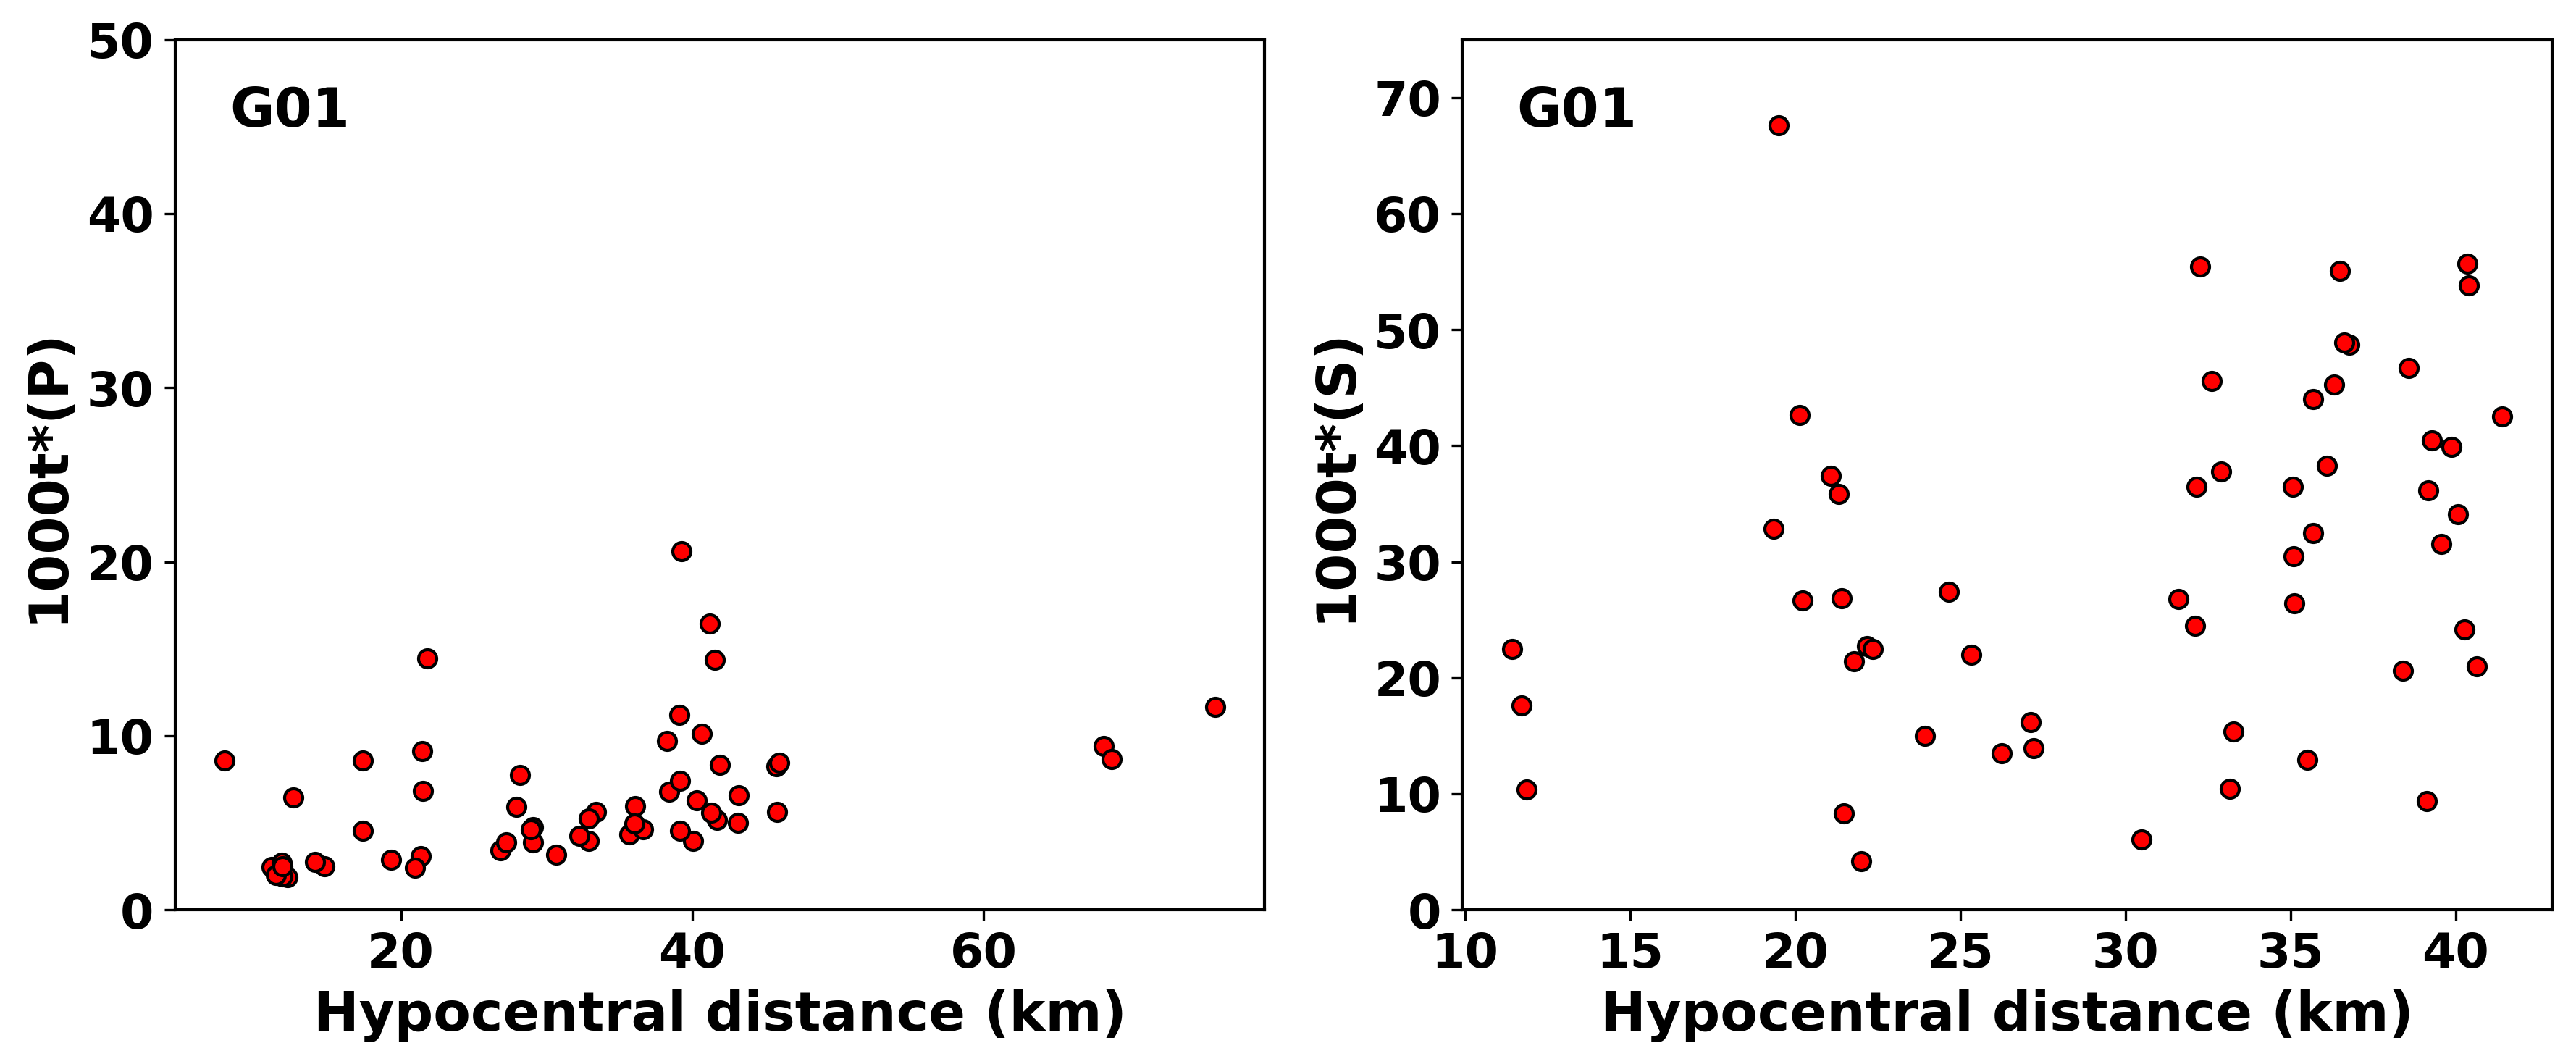

<Figure size 432x288 with 0 Axes>

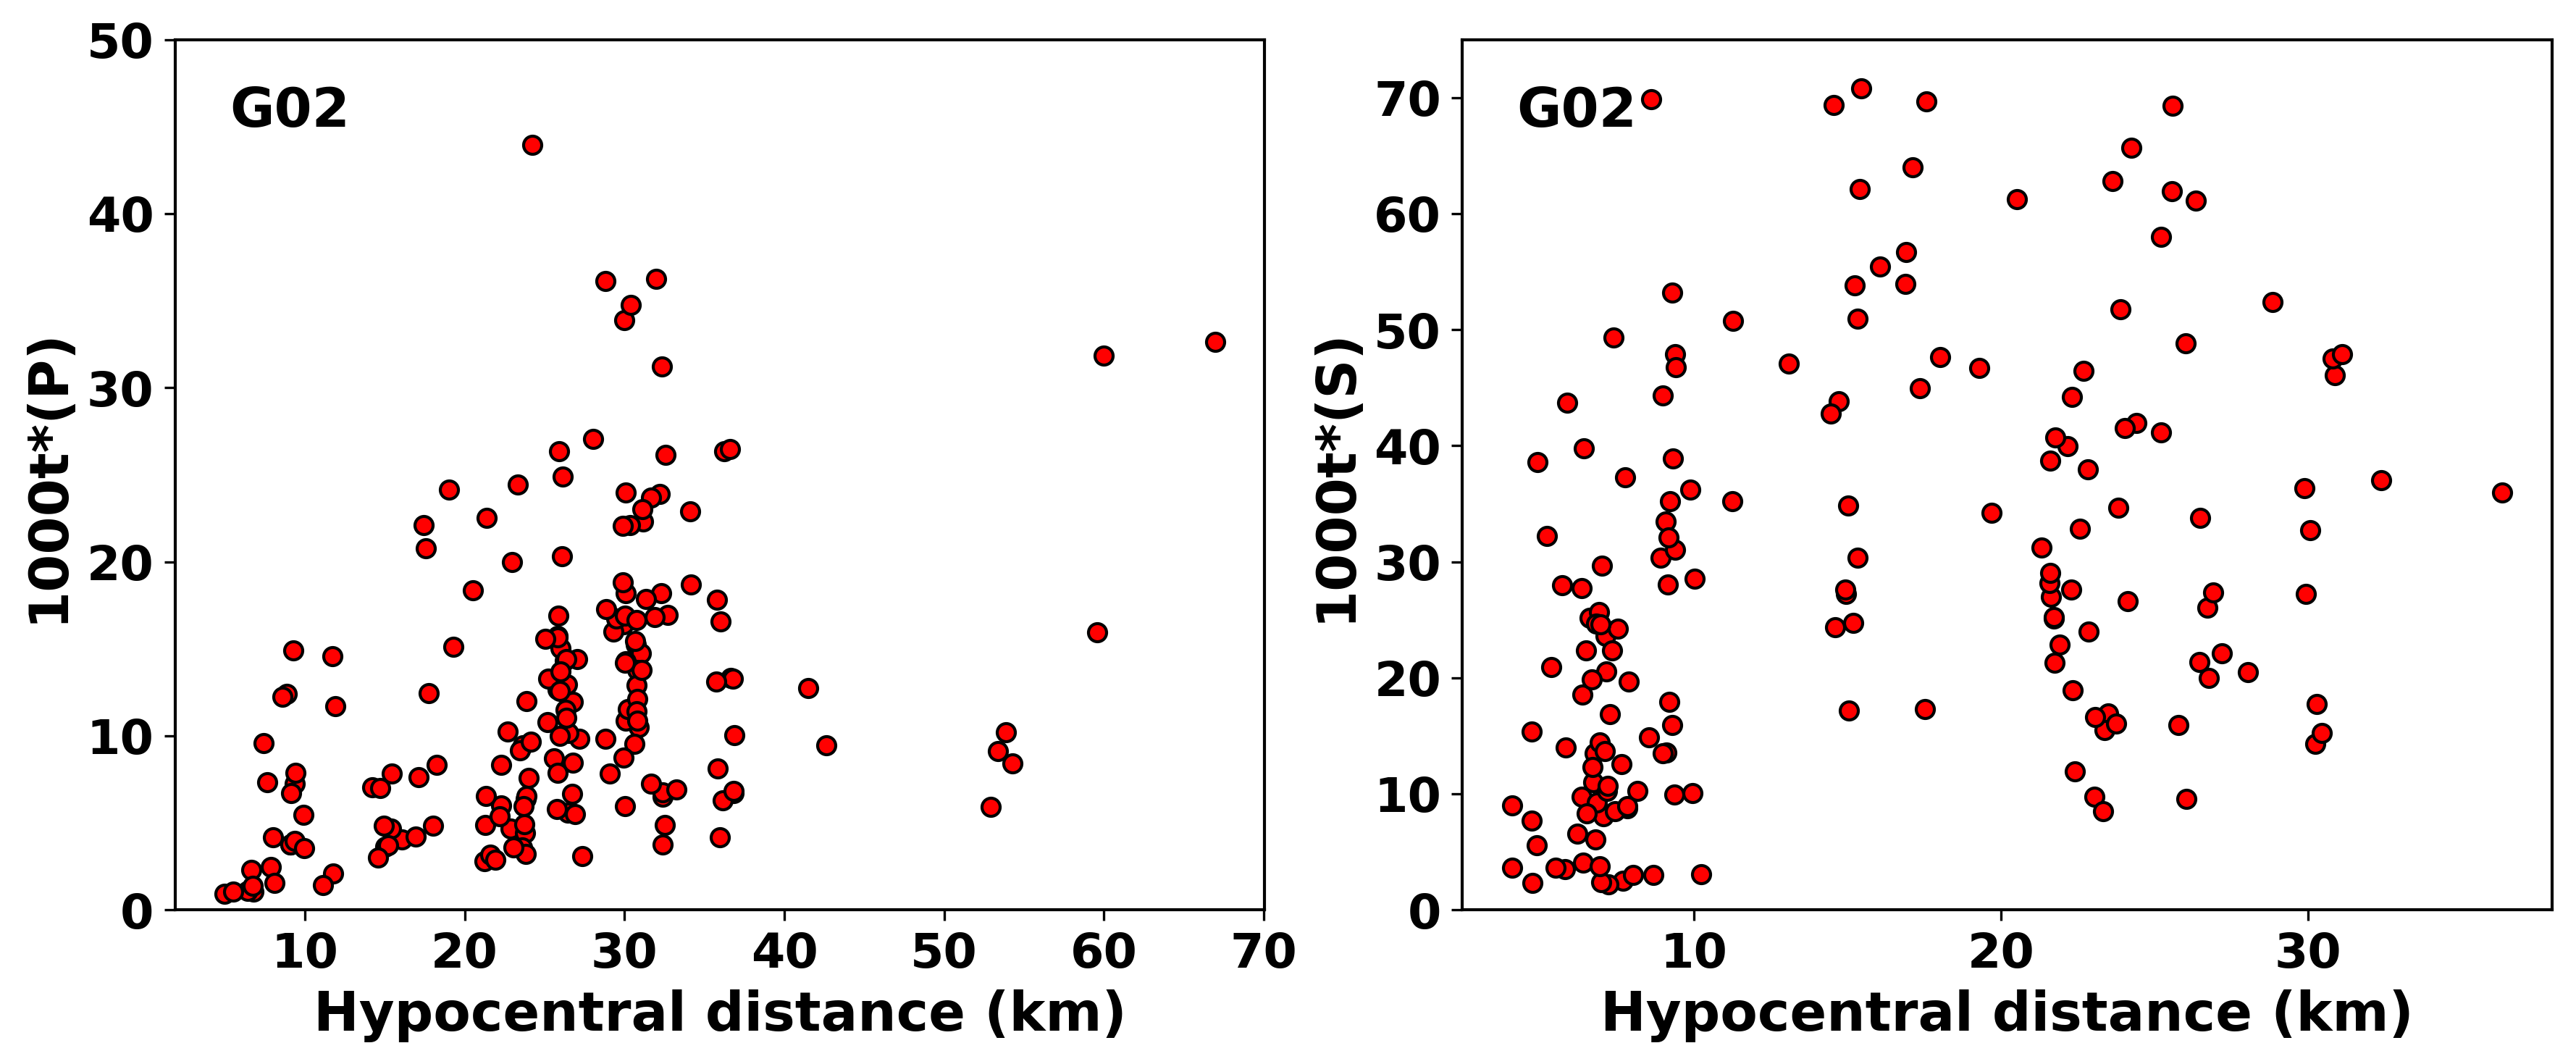

<Figure size 432x288 with 0 Axes>

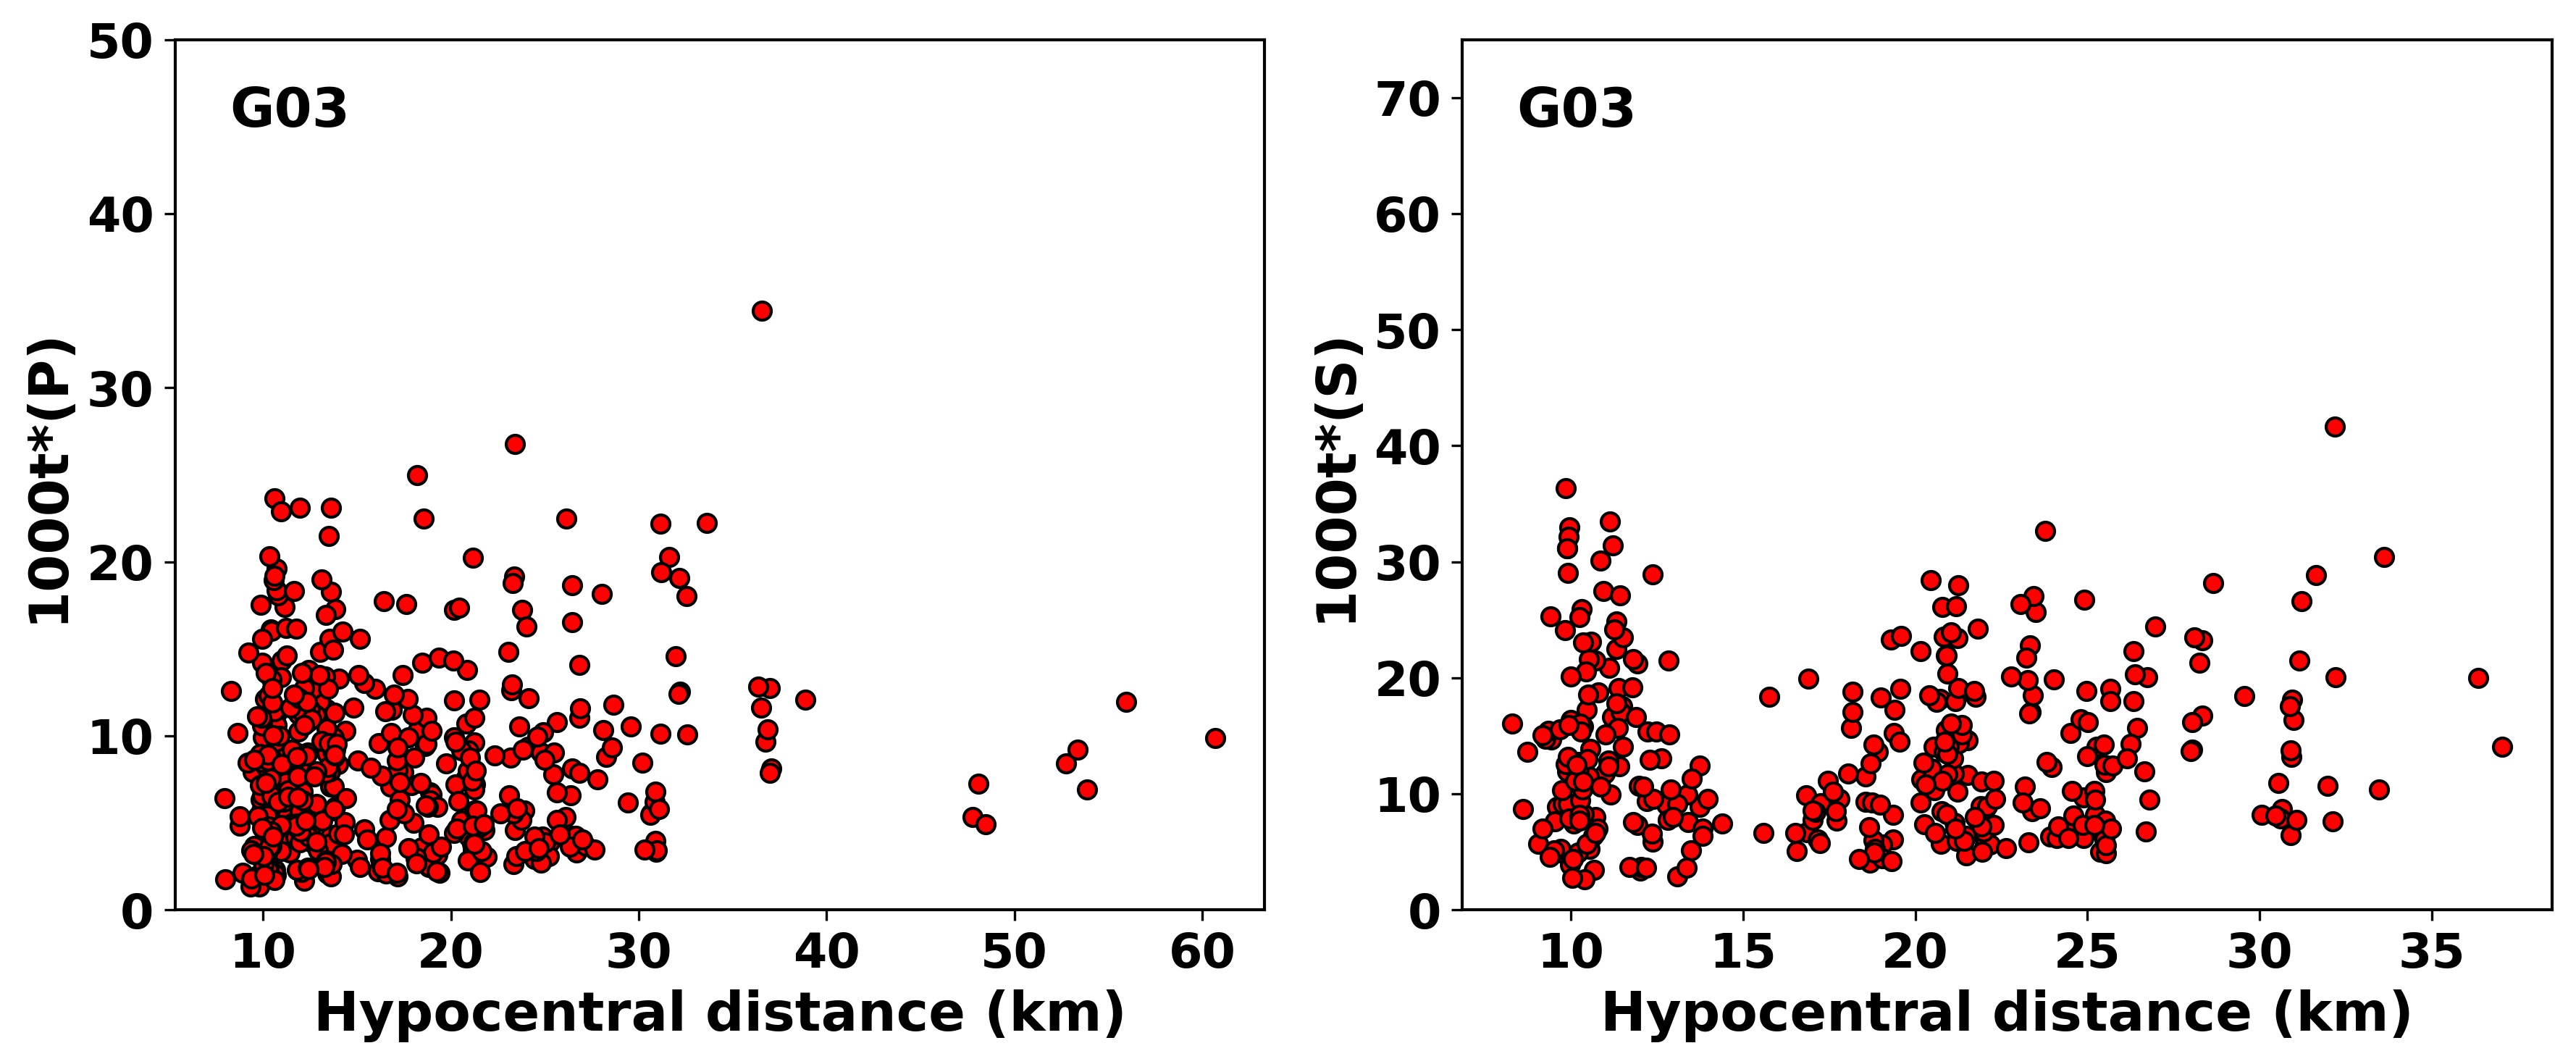

<Figure size 432x288 with 0 Axes>

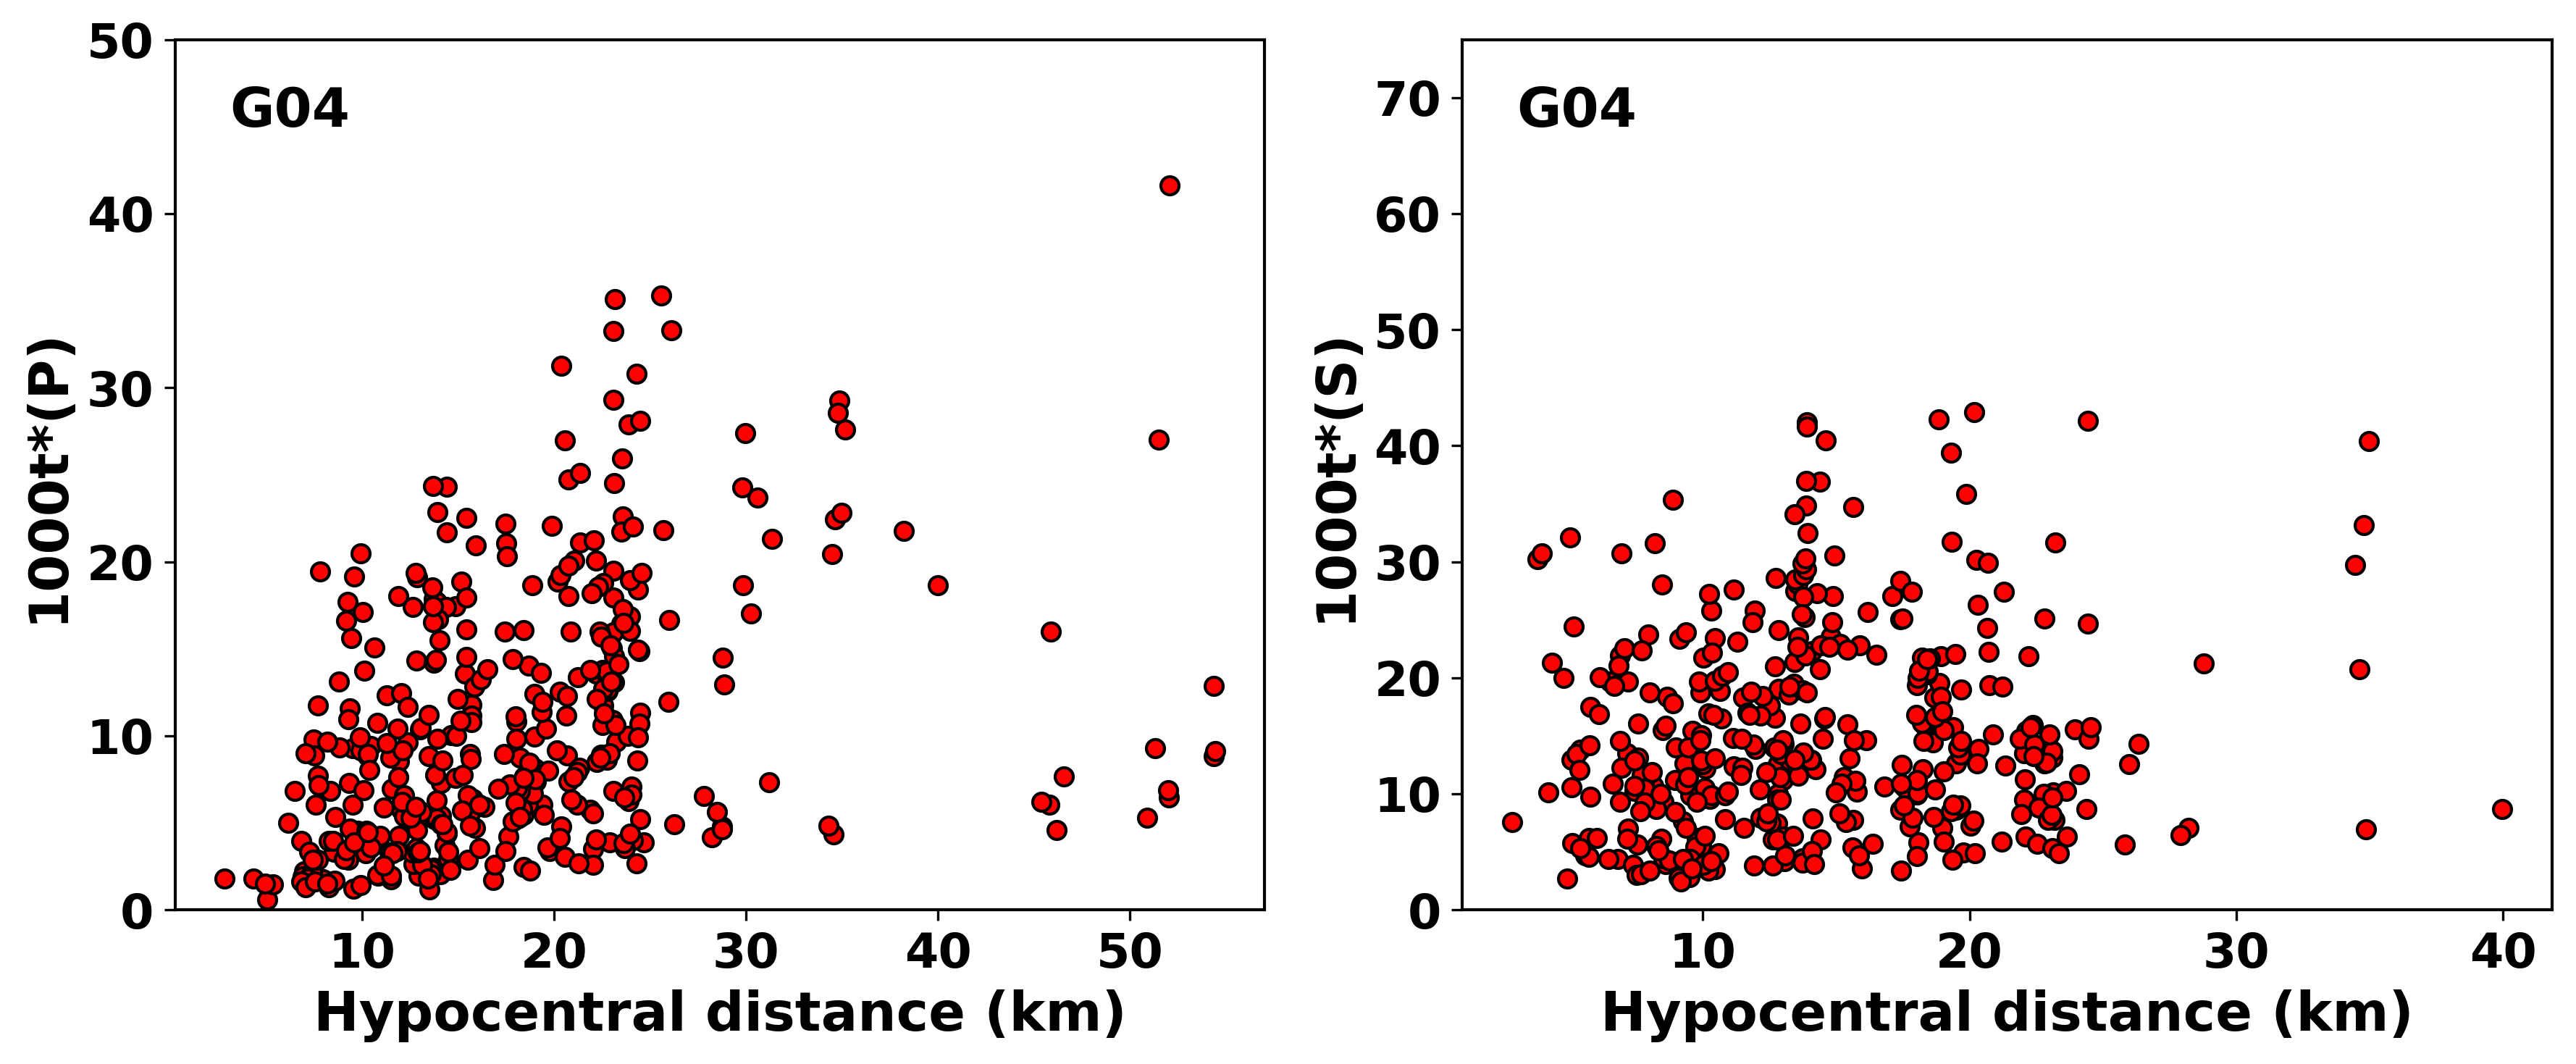

<Figure size 432x288 with 0 Axes>

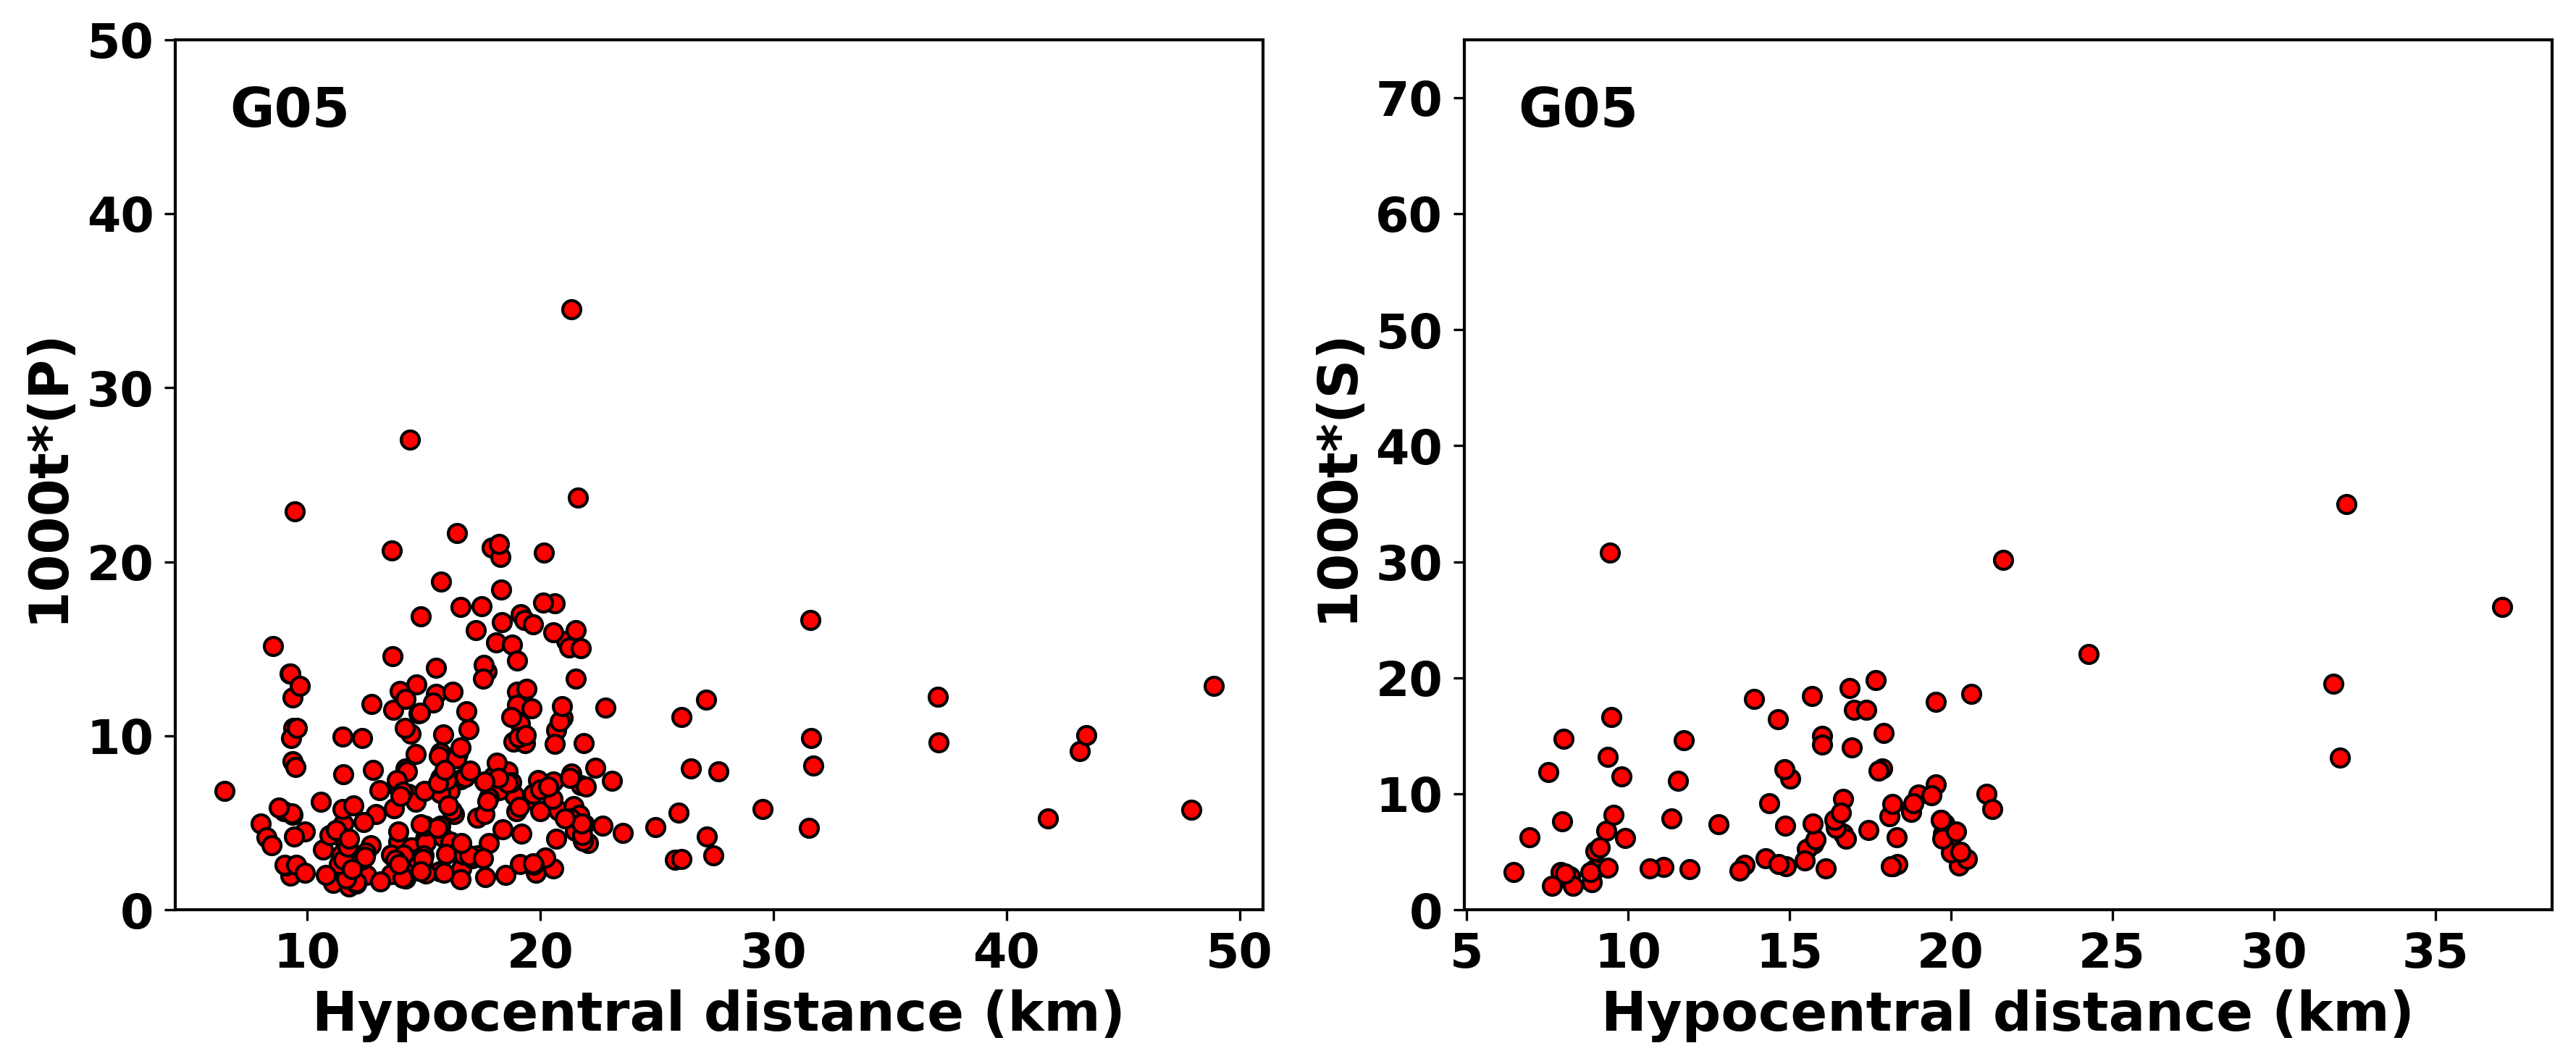

<Figure size 432x288 with 0 Axes>

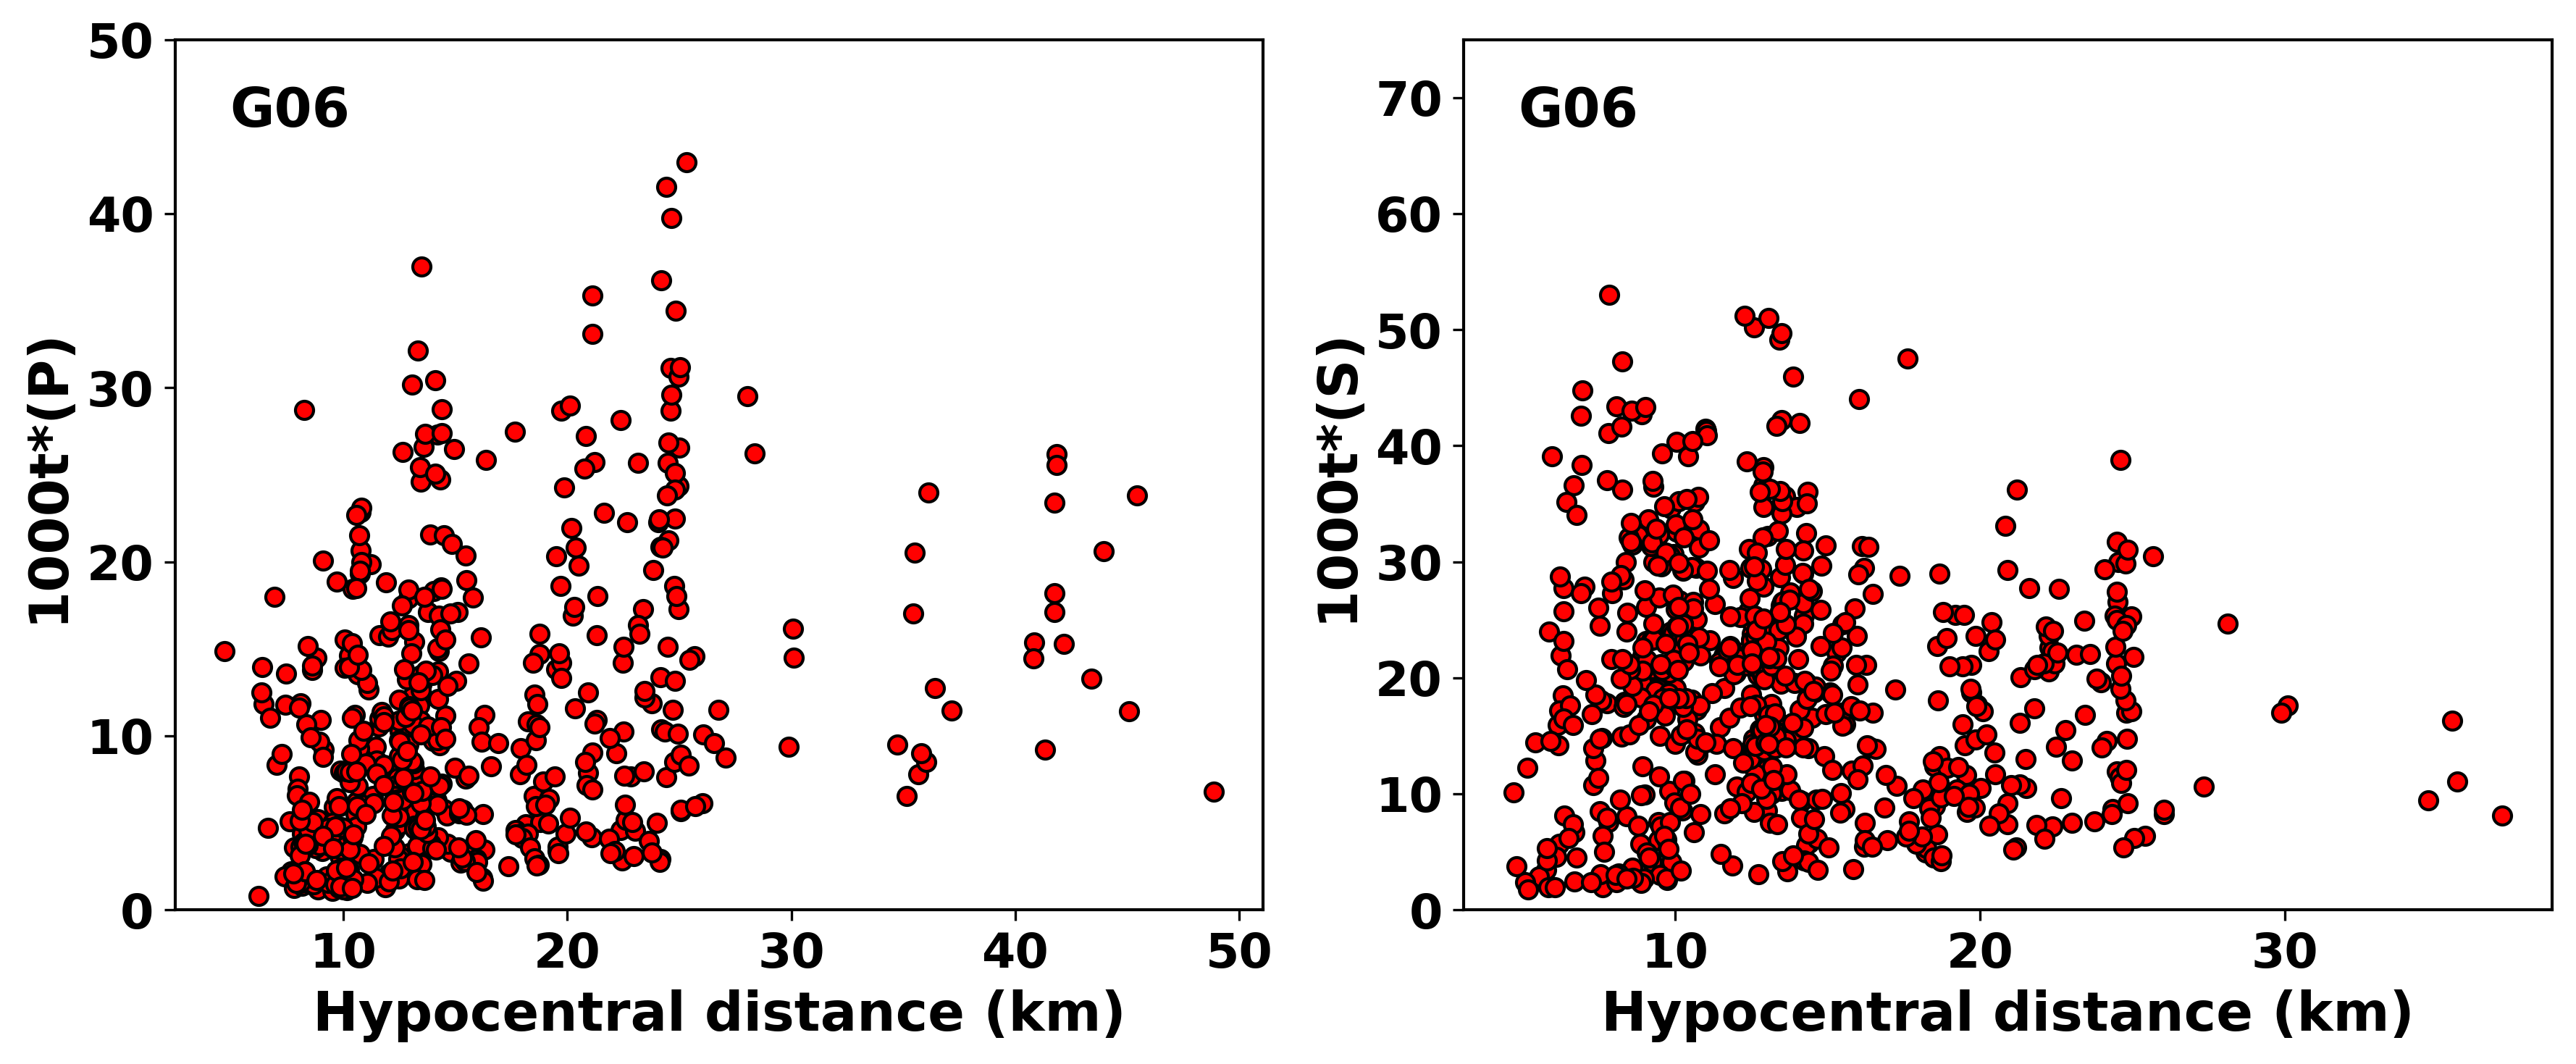

<Figure size 432x288 with 0 Axes>

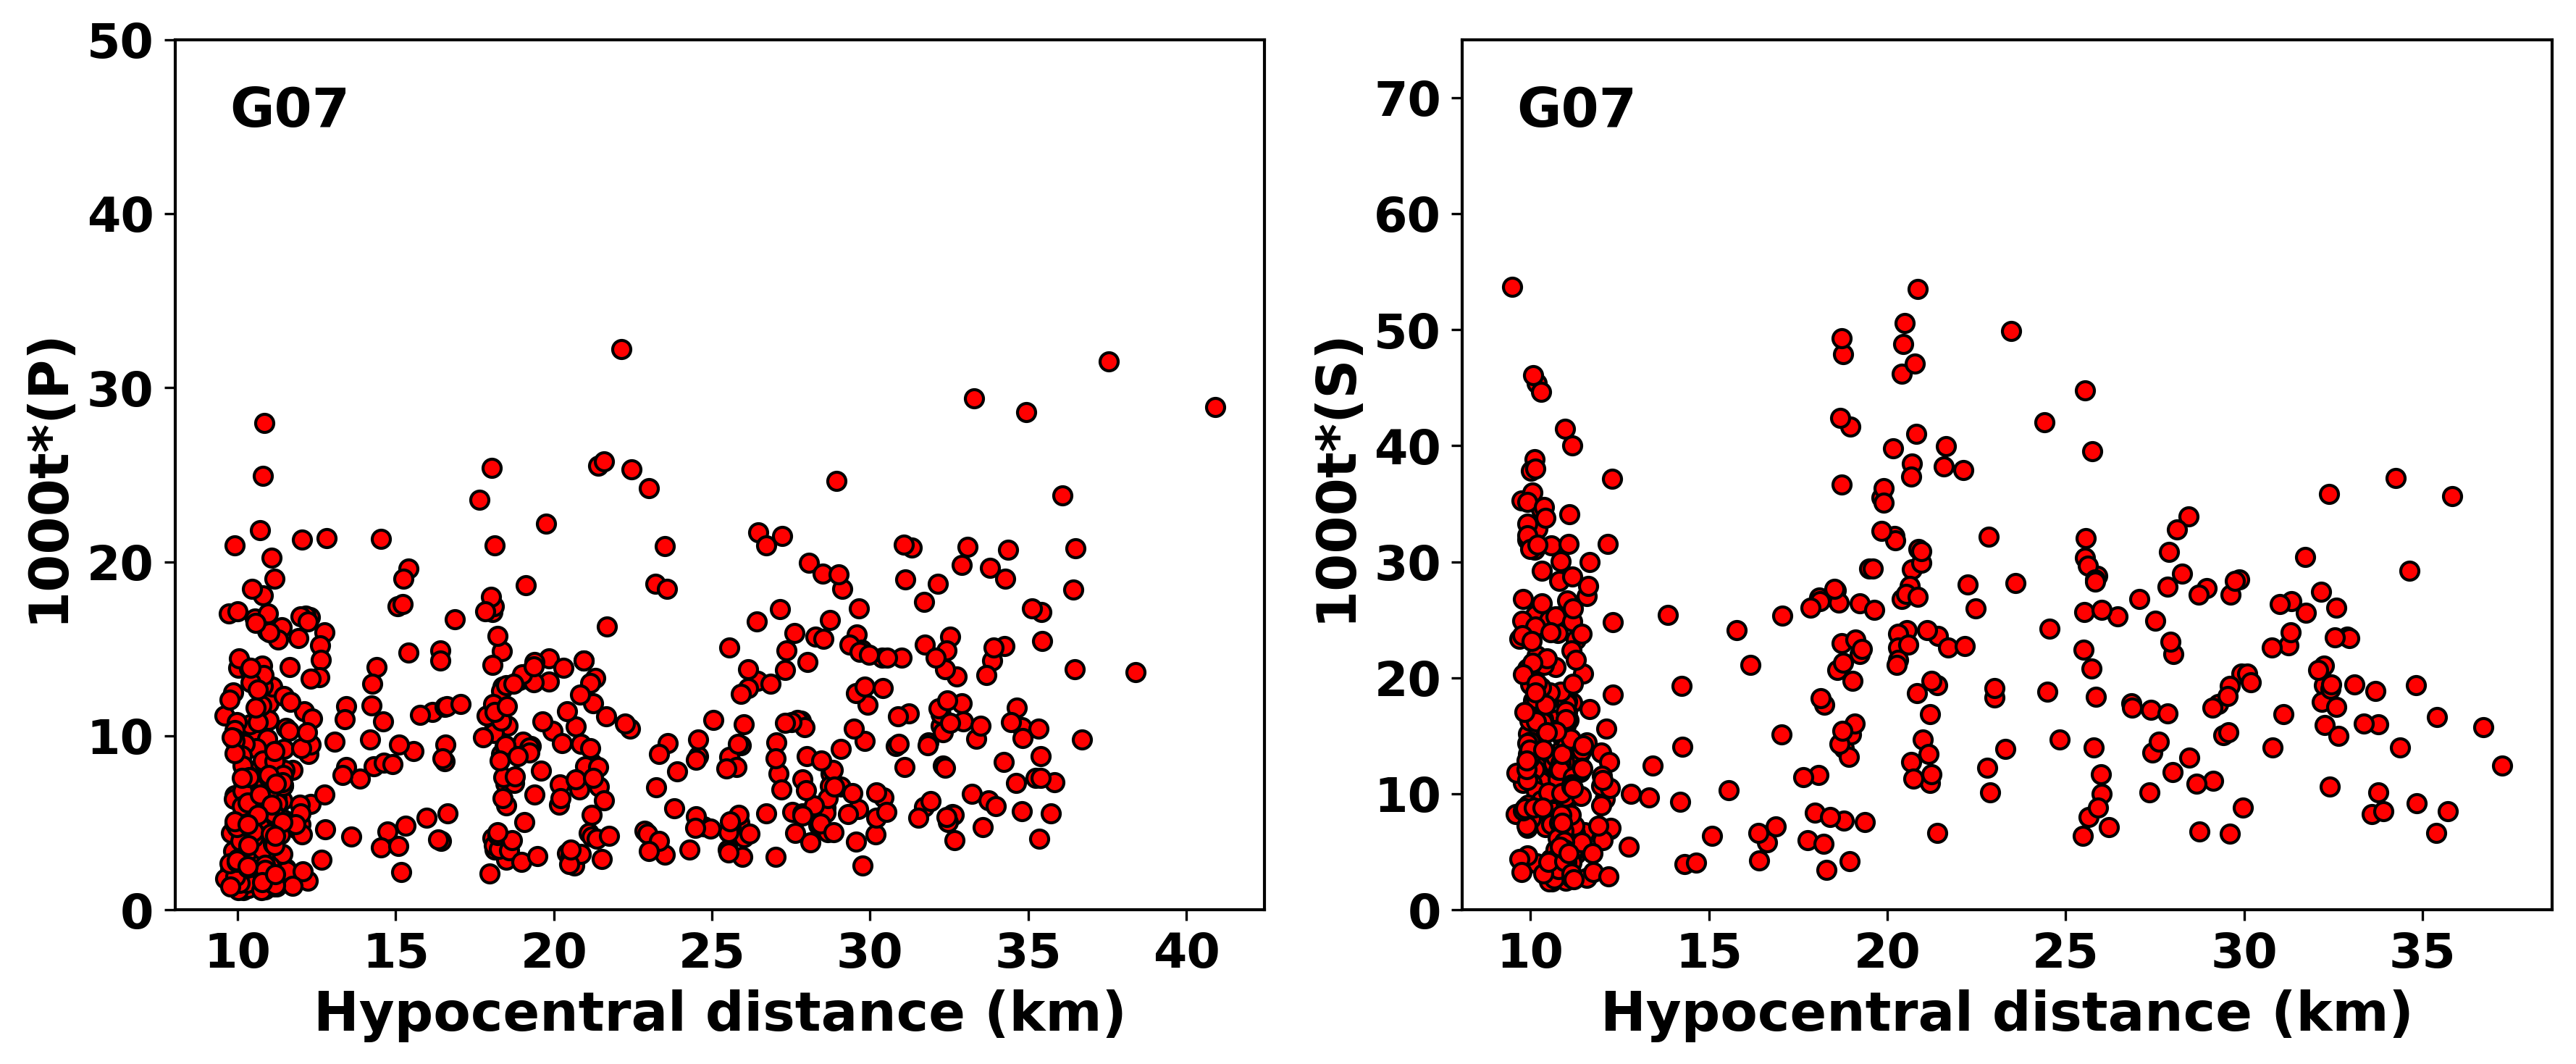

<Figure size 432x288 with 0 Axes>

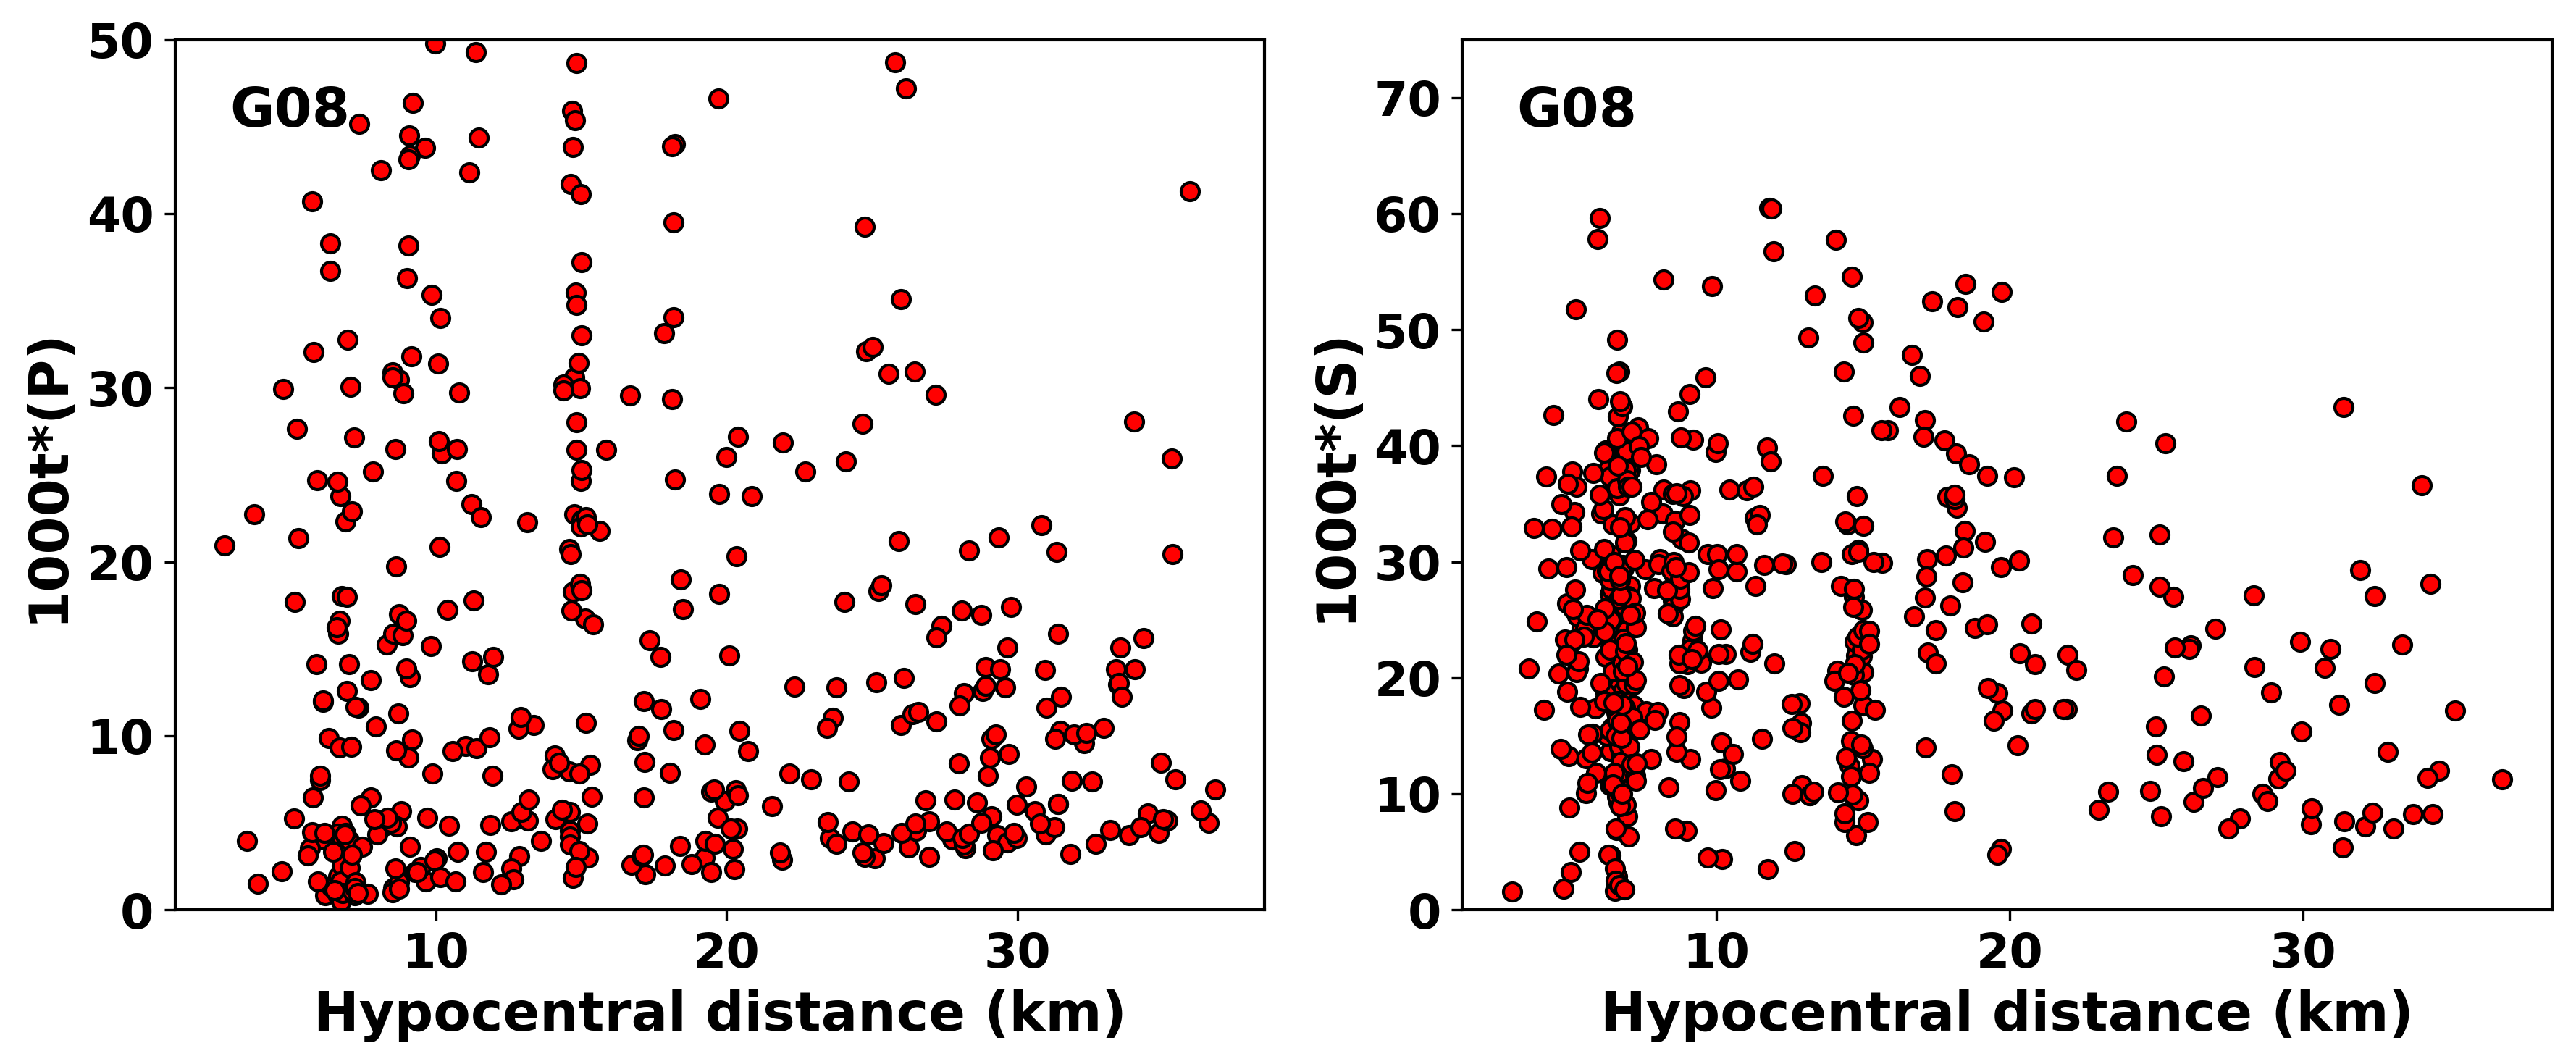

<Figure size 432x288 with 0 Axes>

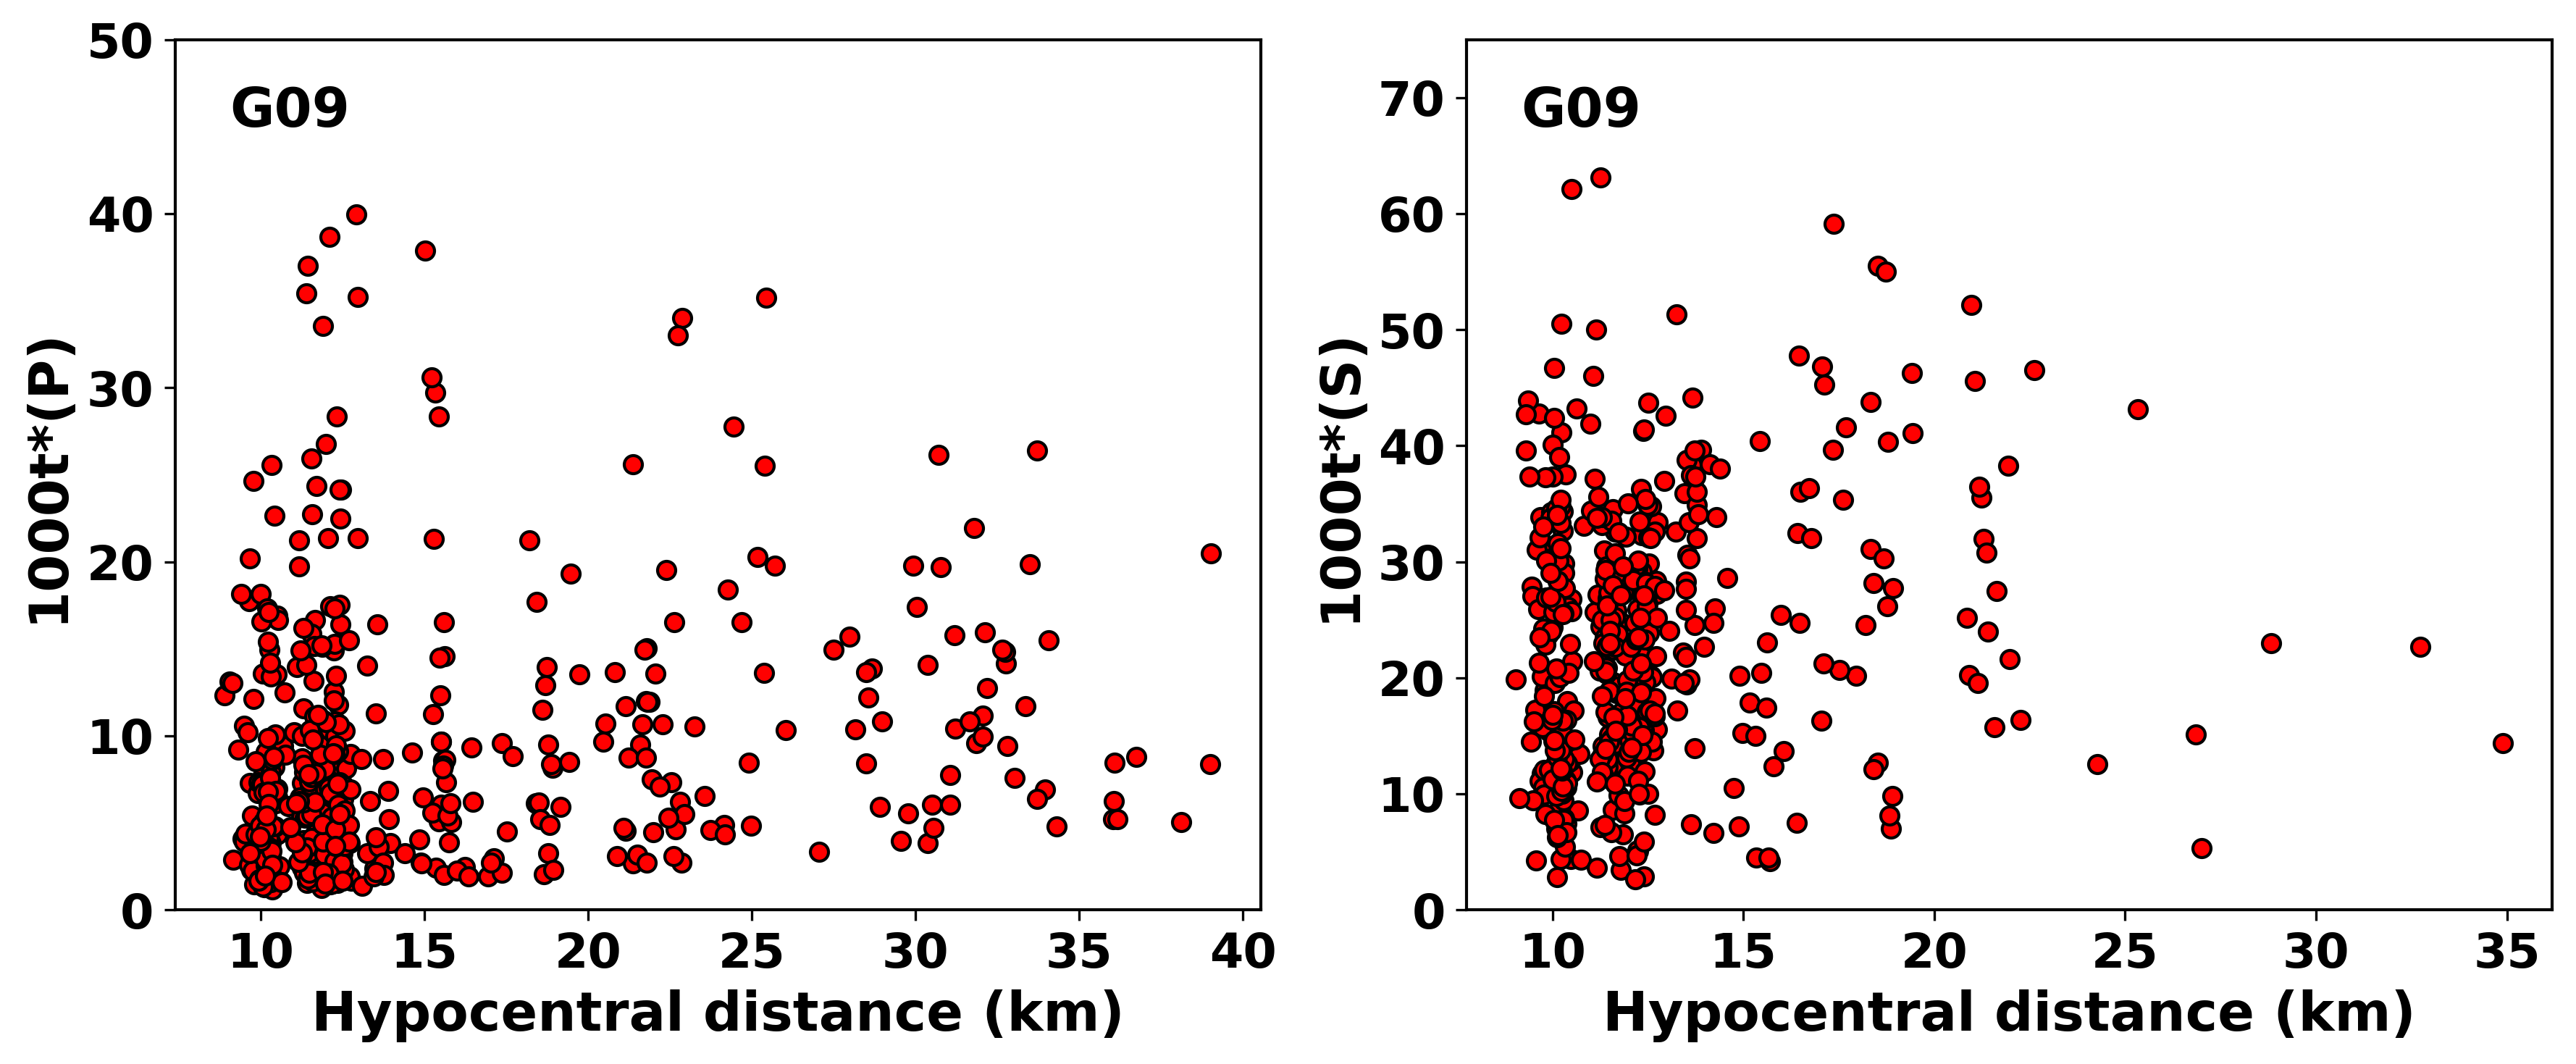

<Figure size 432x288 with 0 Axes>

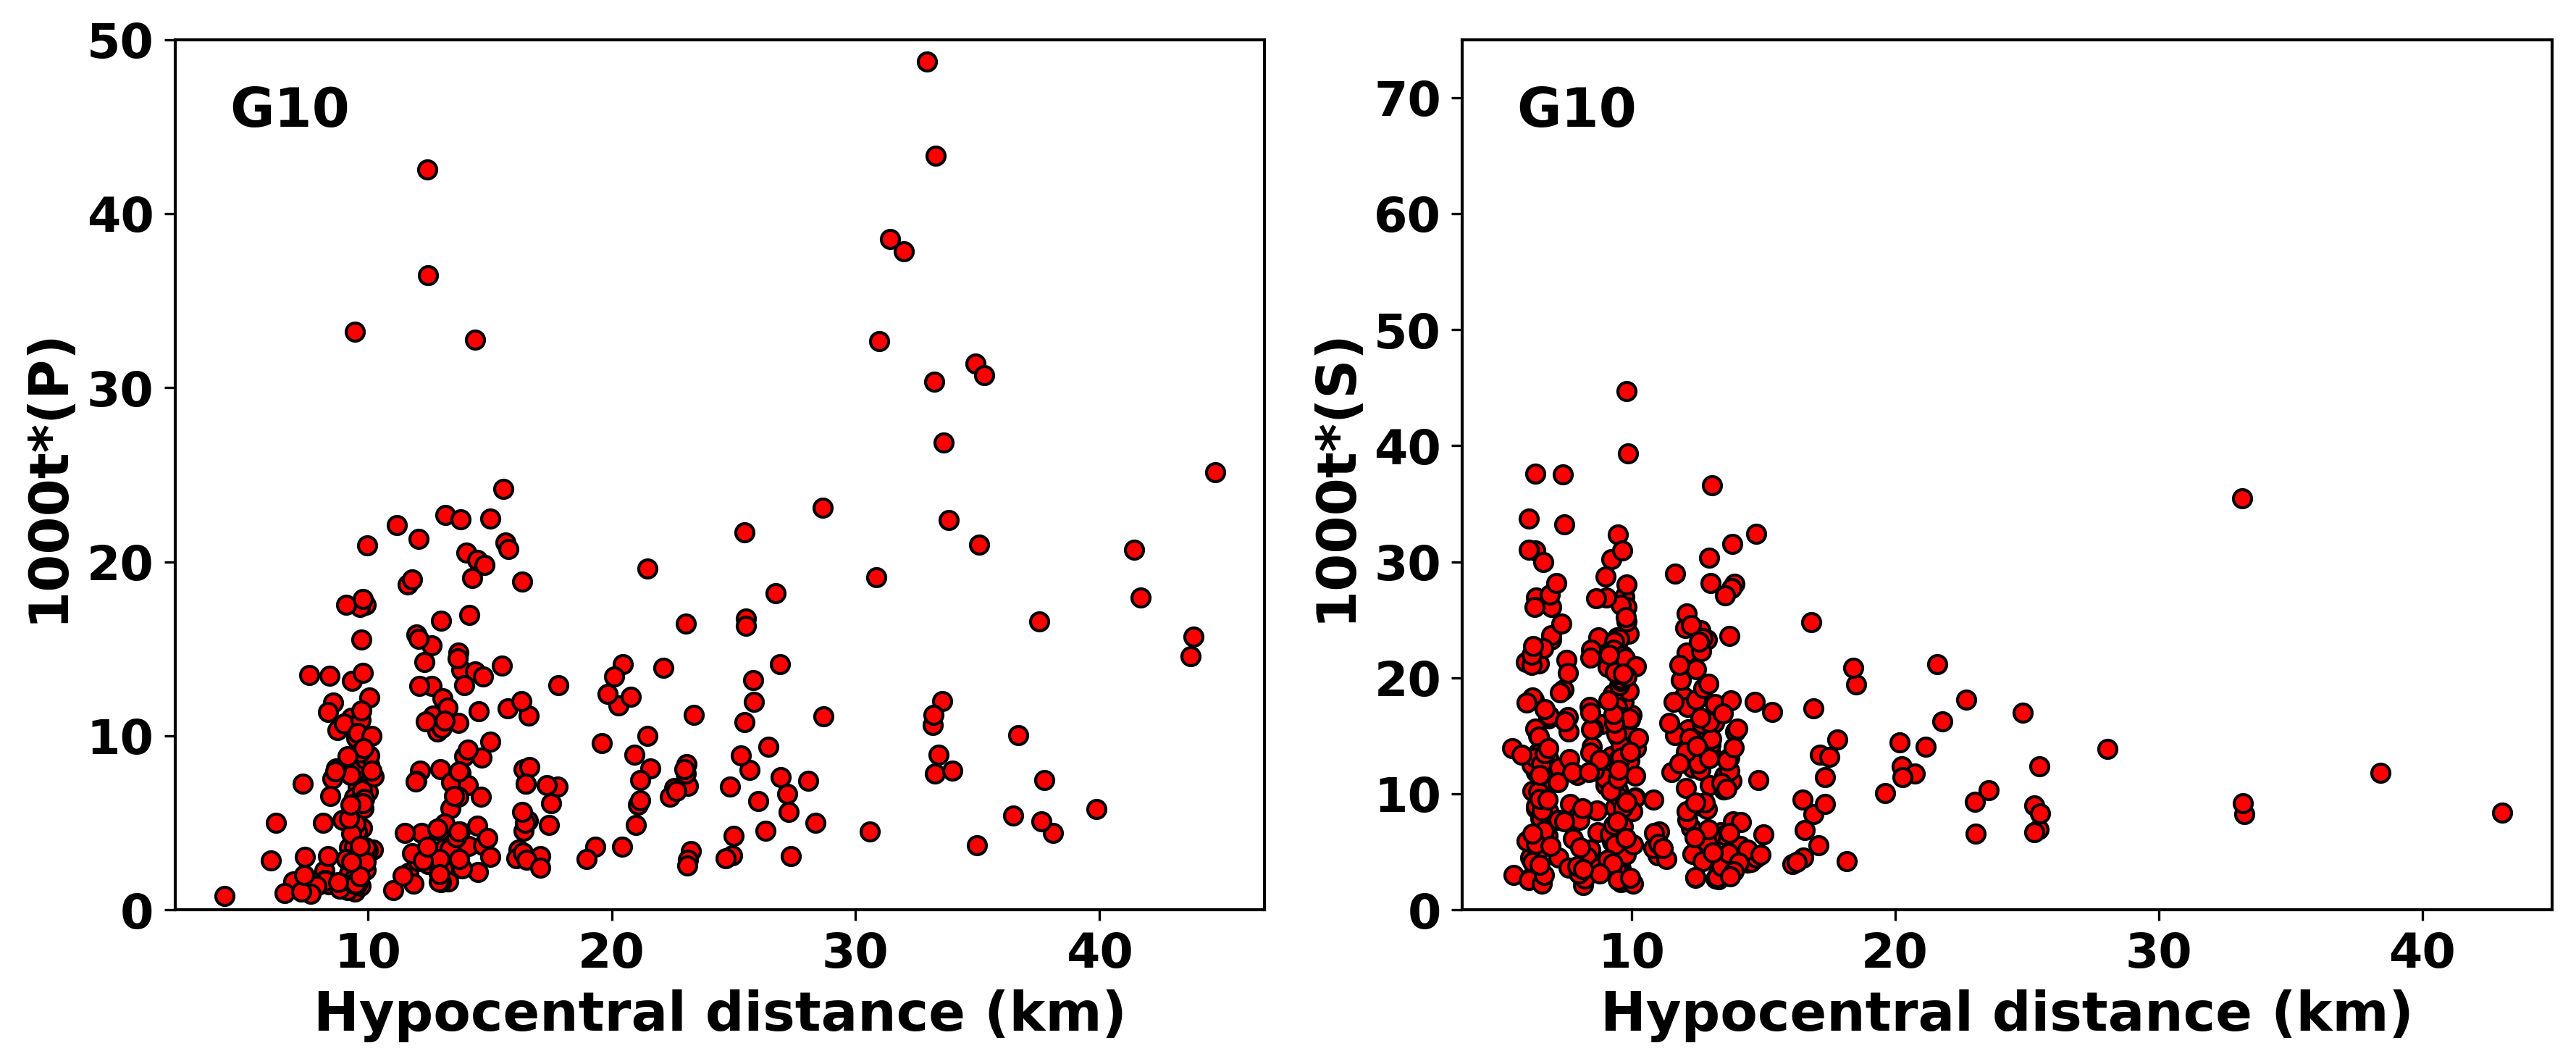

<Figure size 432x288 with 0 Axes>

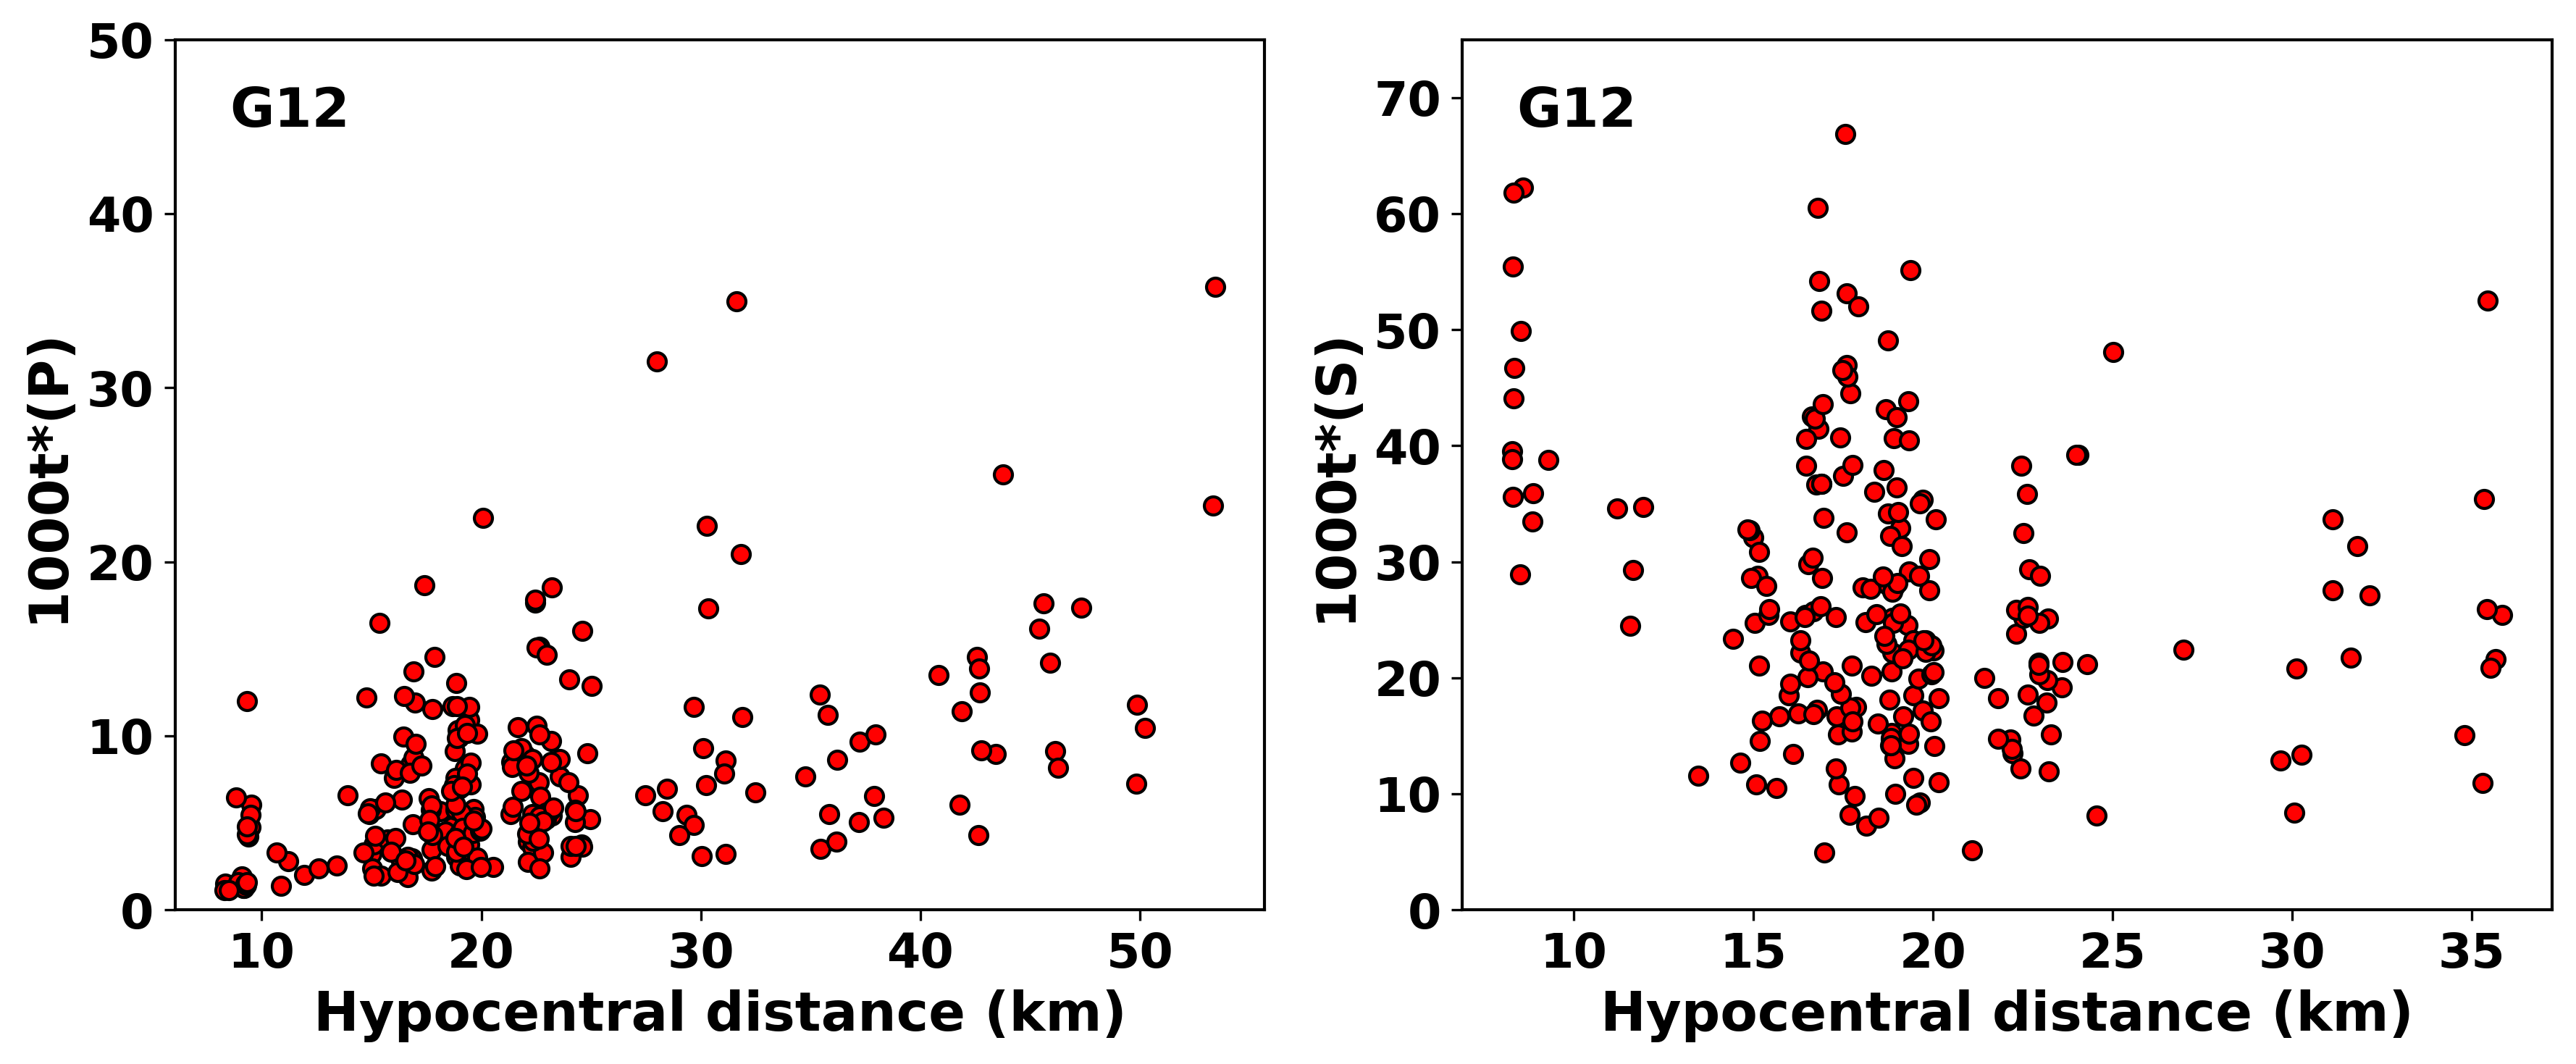

<Figure size 432x288 with 0 Axes>

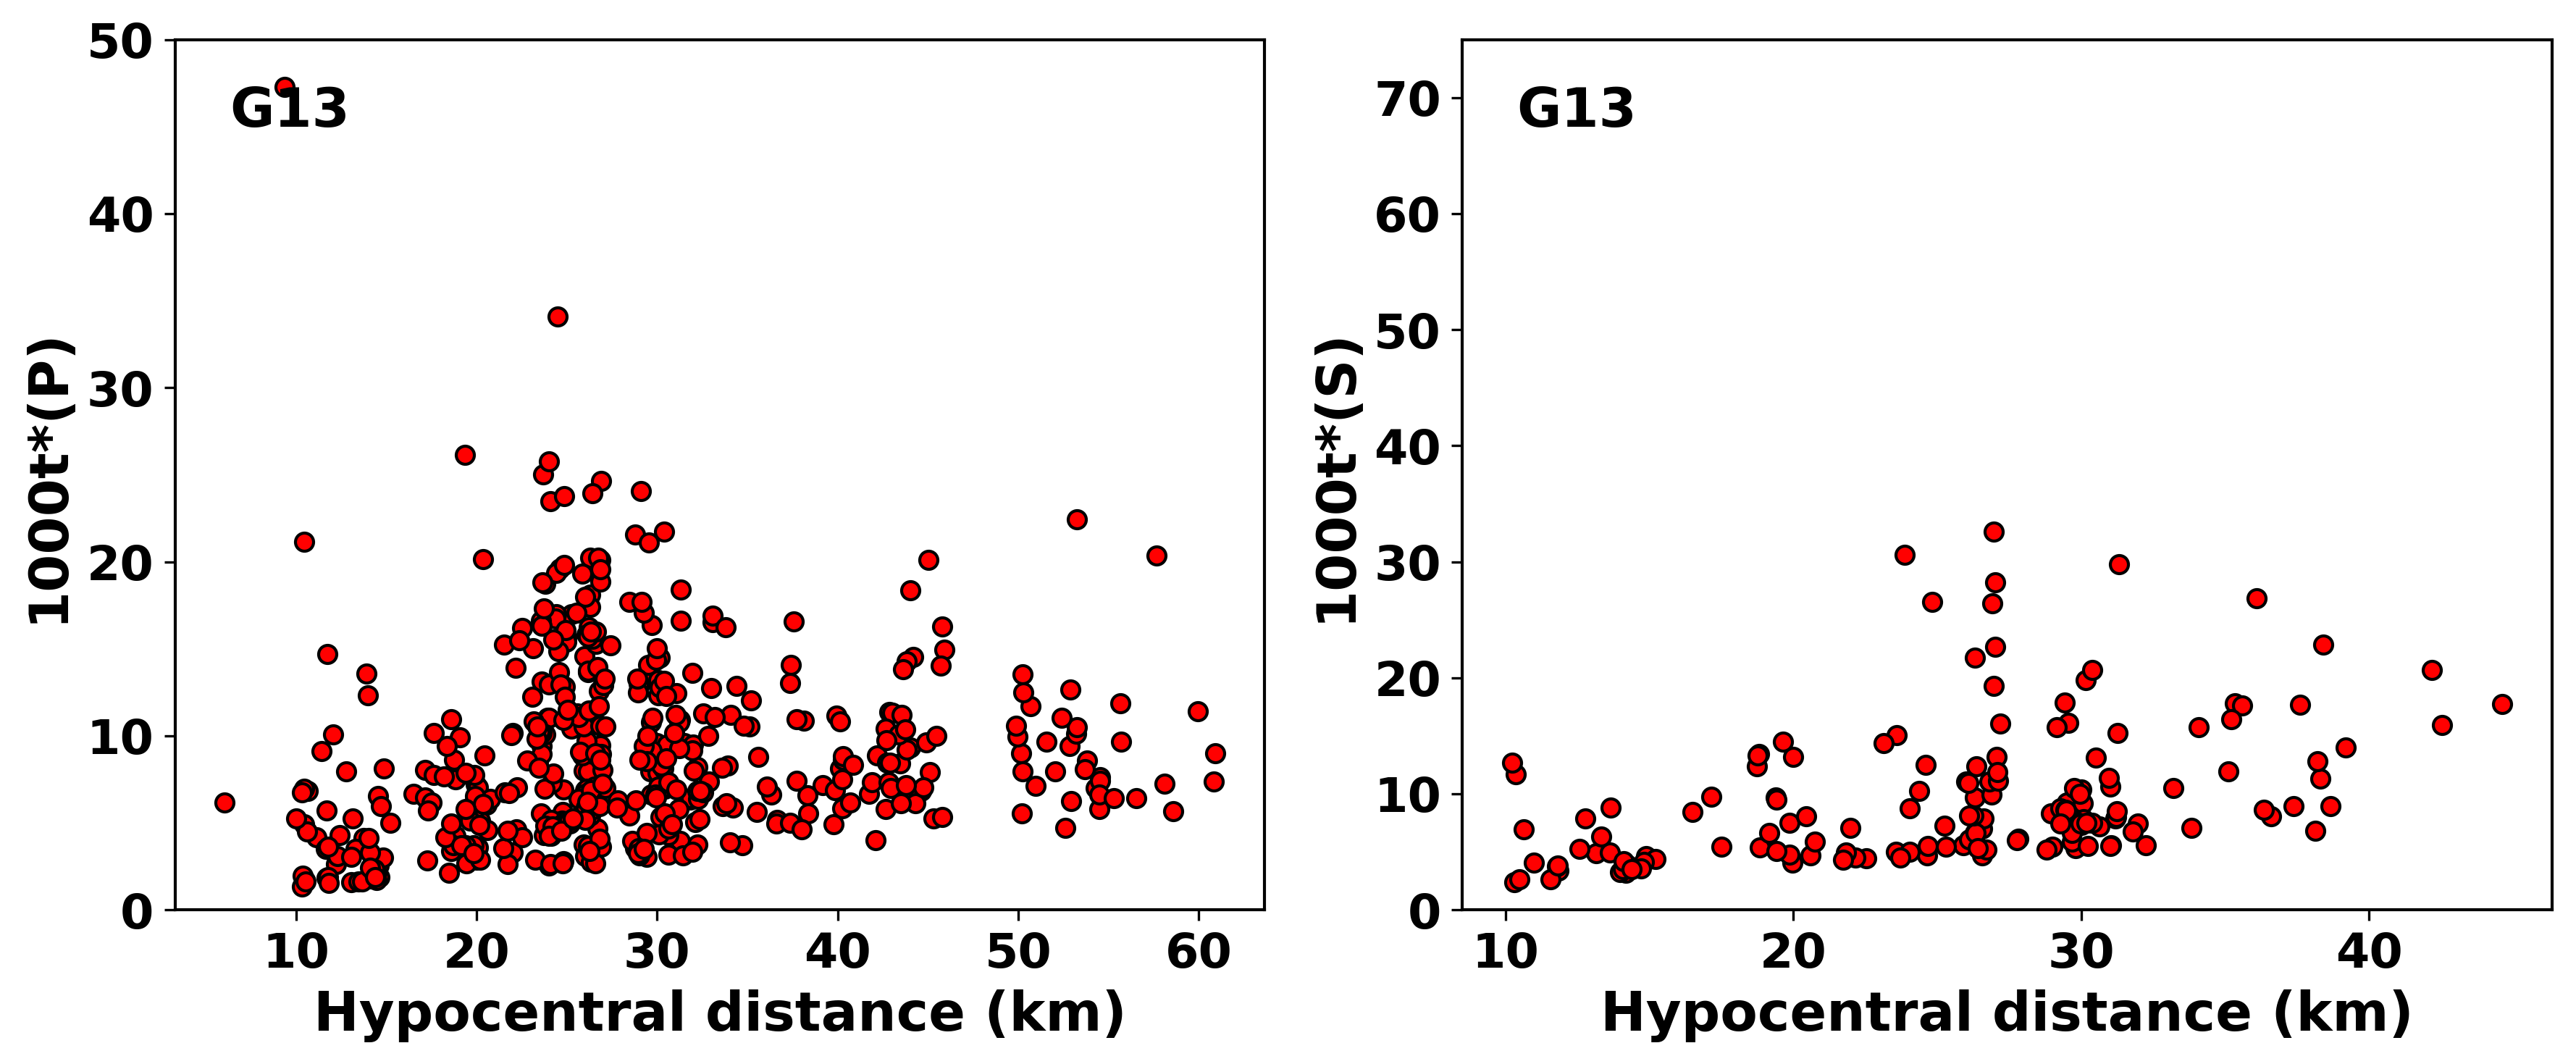

<Figure size 432x288 with 0 Axes>

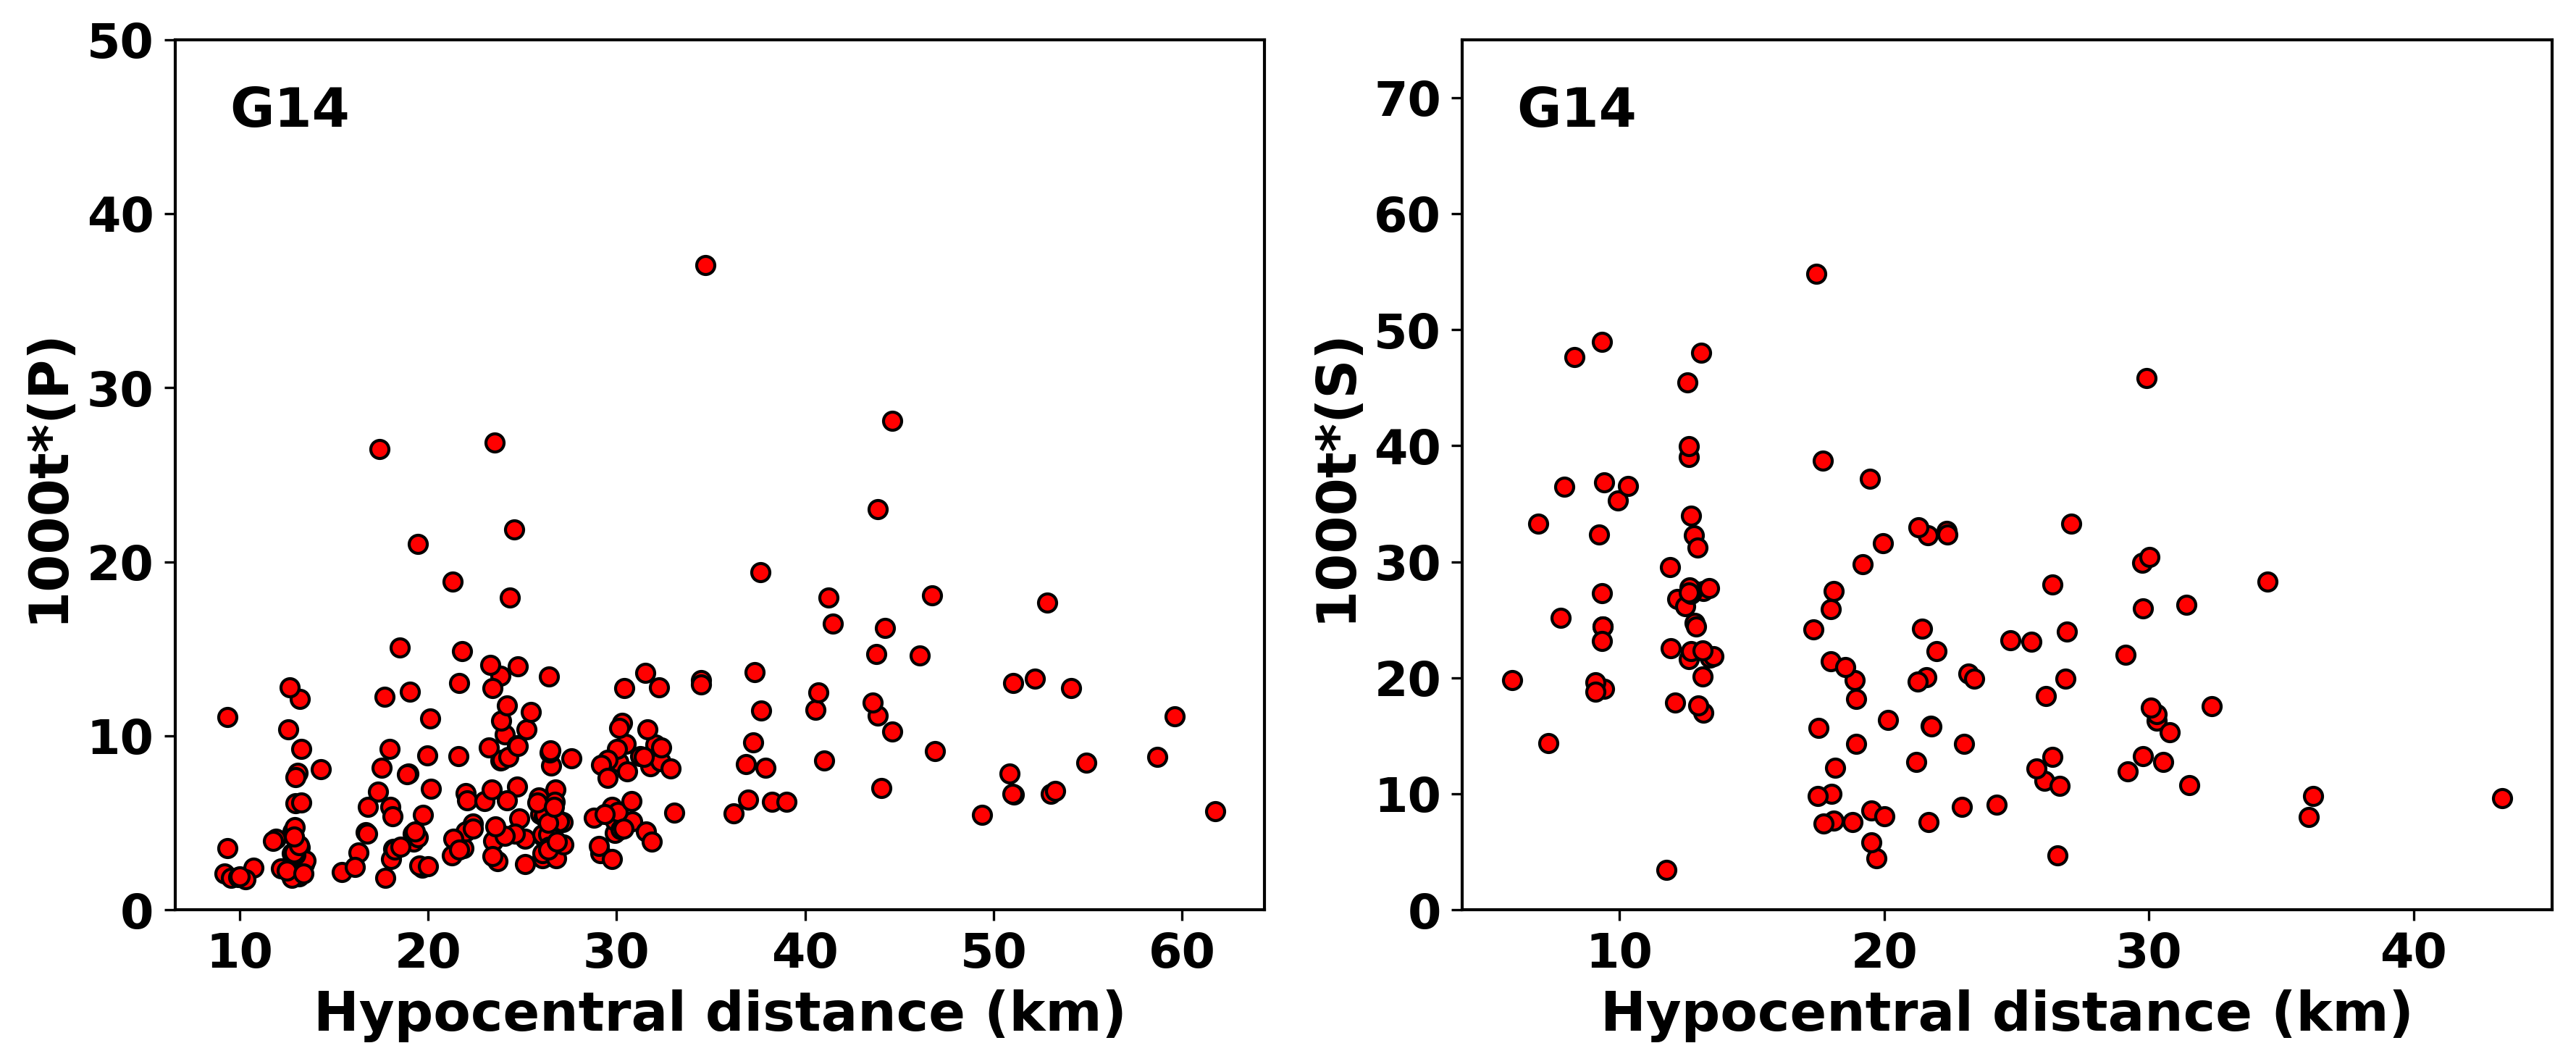

<Figure size 432x288 with 0 Axes>

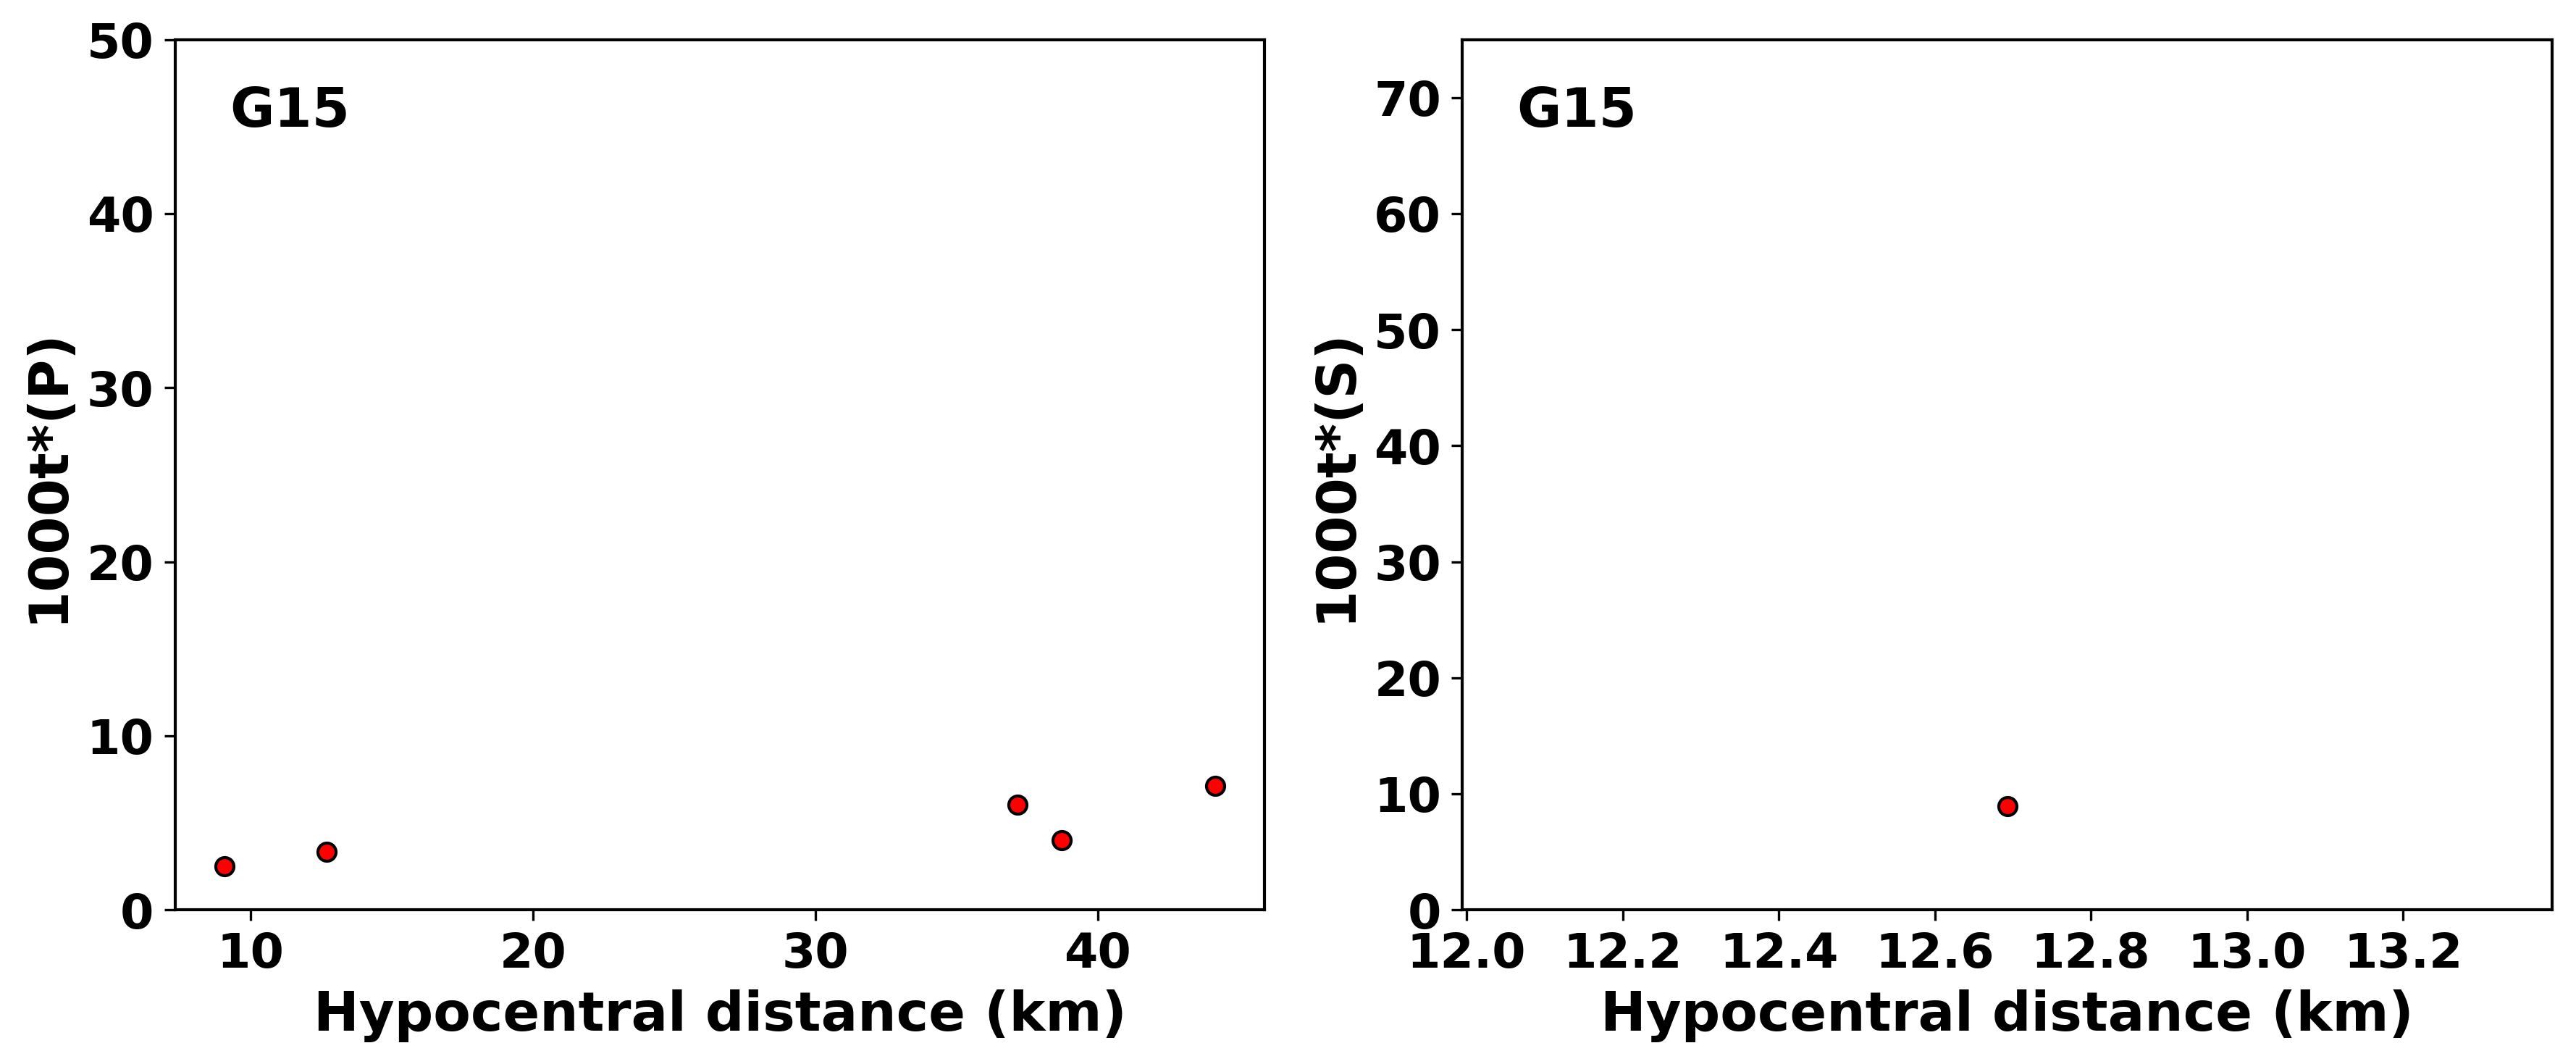

<Figure size 432x288 with 0 Axes>

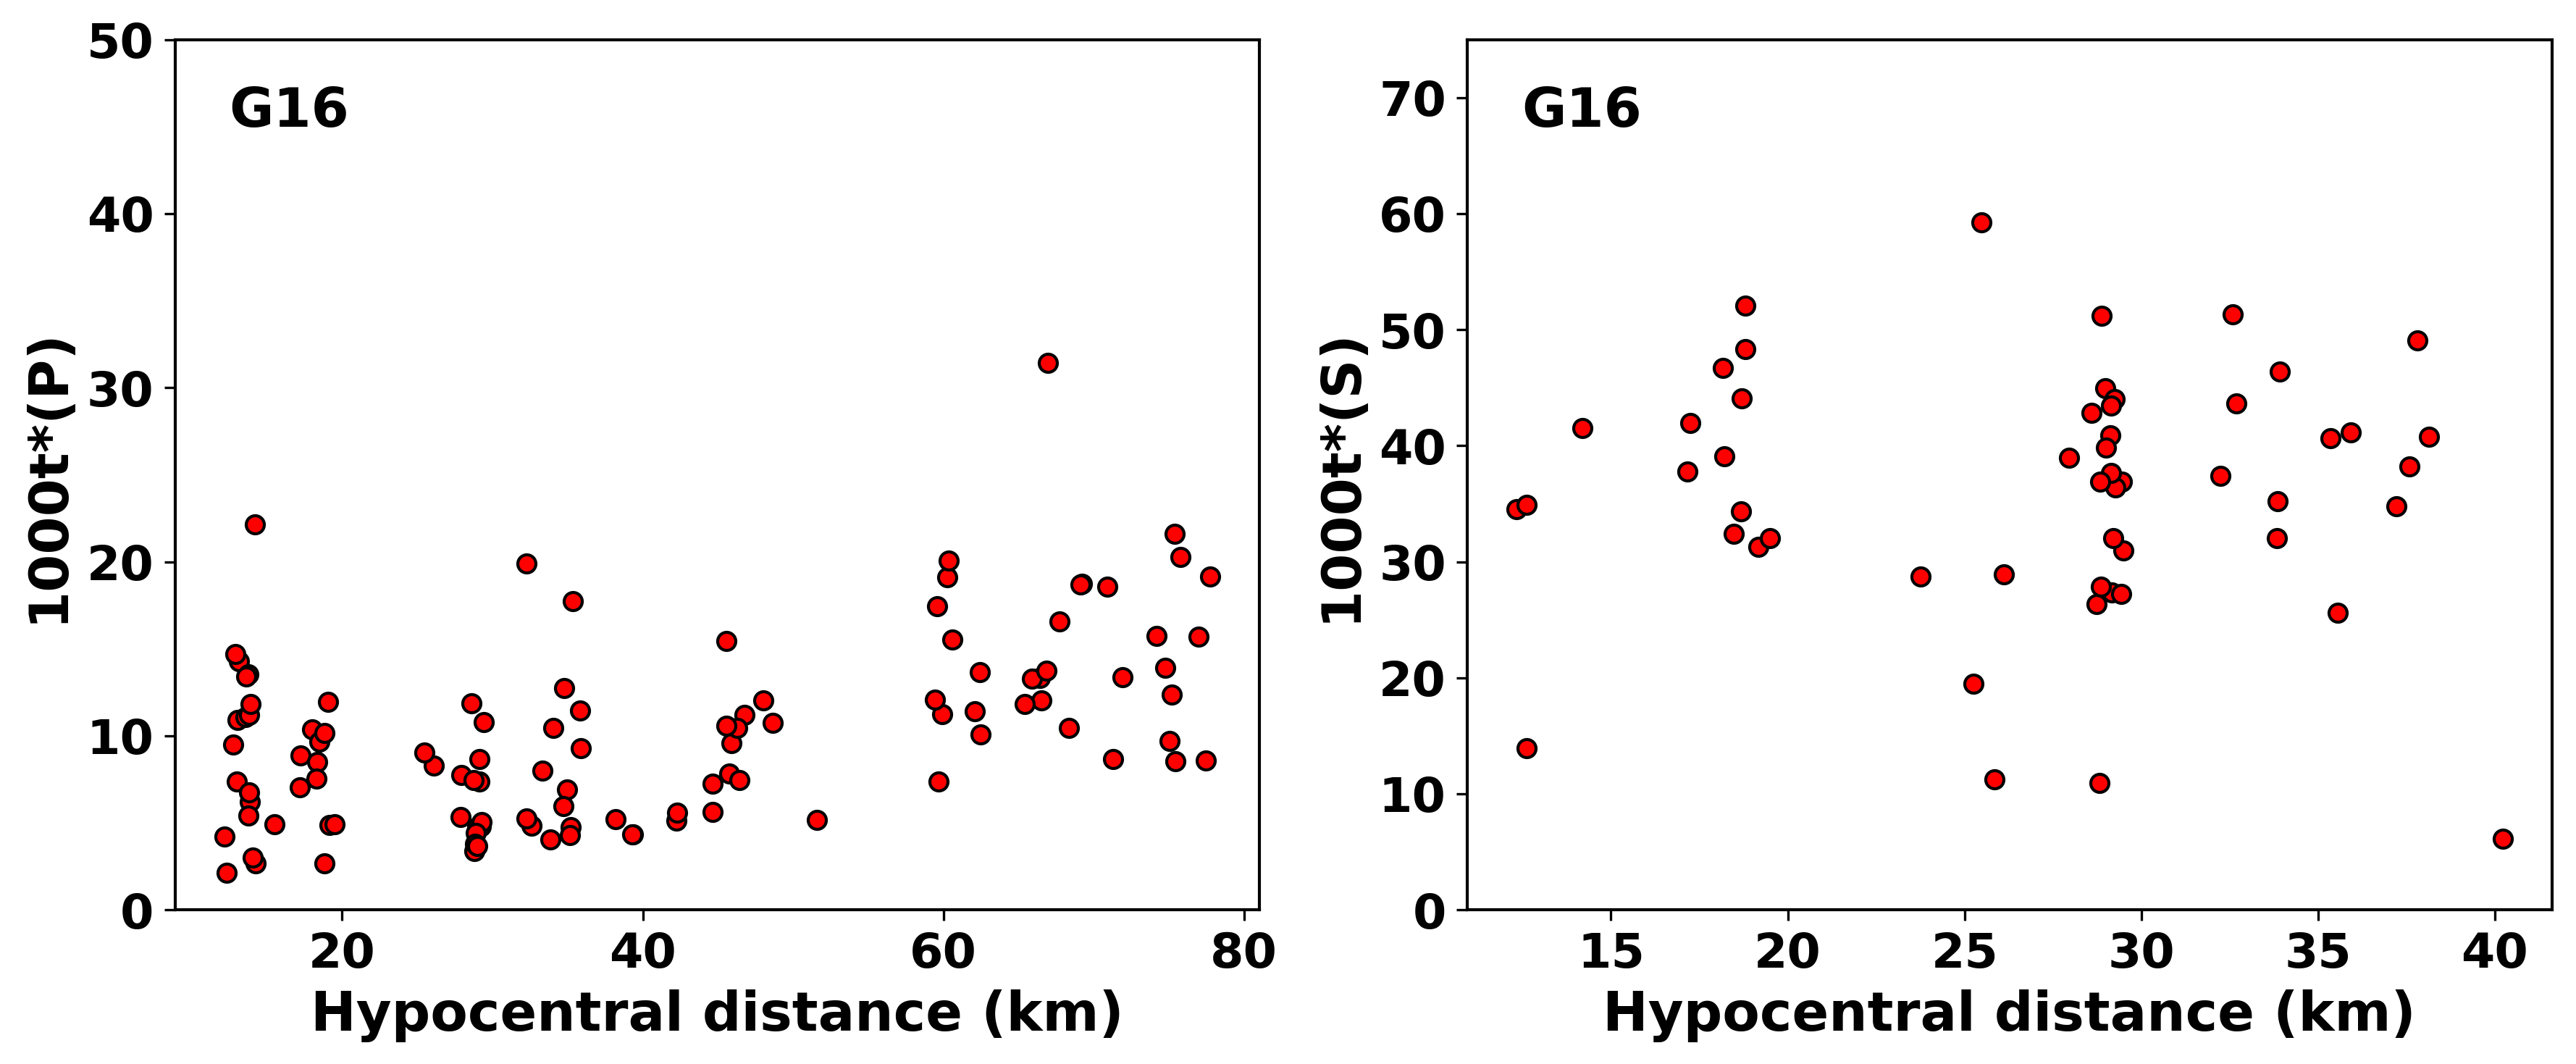

In [53]:
import matplotlib.pyplot as plt

# read tstarPfile and tstarSfile
print(tstarPfile,tstarSfile)
TstarP_Dist=readTstarInformation(tstarPfile,EVE,STA)
TstarS_Dist=readTstarInformation(tstarSfile,EVE,STA)
dislimit=100;
# tstar,dist,evedep,baz,evelon,evelat,mag,time
for sta in ["G01","G02","G03","G04","G05",'G06','G07',"G08","G09","G10","G12","G13","G14","G15","G16"]:
    fig,ax=plt.subplots(1,2,figsize=(12,5))
    temp=np.array(TstarP_Dist[sta])
    #stalon,stalat=STA[sta][0],STA[sta][1]
#     stalon=100
#     index=np.nonzero(temp[:,4] <stalon )
#     distP=temp[index,1];tstarP=temp[index,0]
#     disp=temp[index,1]
    index=np.nonzero(temp[:,2]<dislimit )
    distP=temp[index,1];tstarP=temp[index,0]
    temp=np.array(TstarS_Dist[sta])
    index=np.nonzero(temp[:,2] <dislimit )
    distS=temp[index,1];tstarS=temp[index,0]
    ax[0].plot(distP,1000*tstarP,'ro',markeredgecolor='black')
    ax[0].annotate(sta, xy=(0.05, 0.9), xycoords='axes fraction',fontsize=18)
    #S-P time multiplied by 8 is hypocentral distance, not epicentral (angular) distance, OK 
    ax[0].set_xlabel("Hypocentral distance (km)") 
    ax[0].set_ylabel("1000t*(P)")
    
    ax[0].set_yticks(np.arange(0,60,10))
    ax[0].set_ylim([0,50])
#     ax[0].set_yticklabels(list(map(str,np.arange(0,int(np.max(1000*tstarP))+2,10))))
    
    
    
    ax[1].plot(distS,1000*tstarS,'ro',markeredgecolor='black')
    ax[1].annotate(sta, xy=(0.05, 0.9), xycoords='axes fraction',fontsize=18)
    ax[1].set_xlabel("Hypocentral distance (km)") 
    ax[1].set_yticks(np.arange(0,80,10))
    ax[1].set_ylim([0,75])
    #S-P time multiplied by 8 is hypocentral distance, not epicentral (angular) distance, OK 
    ax[1].set_ylabel("1000t*(S)")
    plt.tight_layout()
    plt.savefig("./Figure/AStation_tstarDist_{}.jpg".format(sta))
    plt.pause(0.1)
    plt.clf()
    


./Output/P_tstar_selected.dat ./Output/S_tstar_selected.dat


<Figure size 432x288 with 0 Axes>

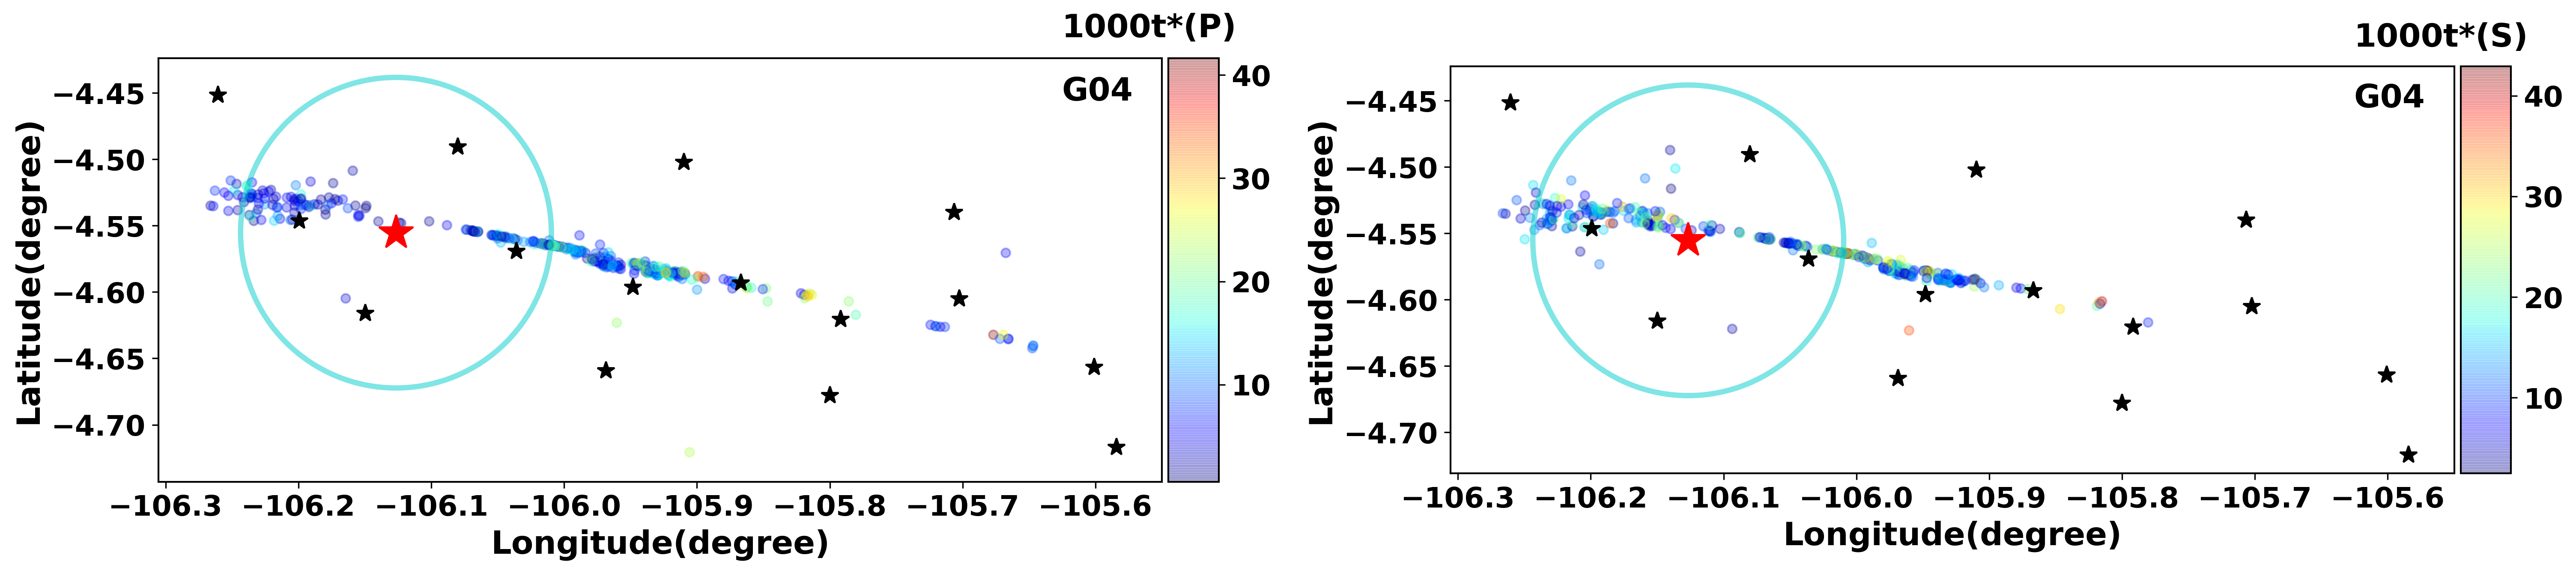

<Figure size 432x288 with 0 Axes>

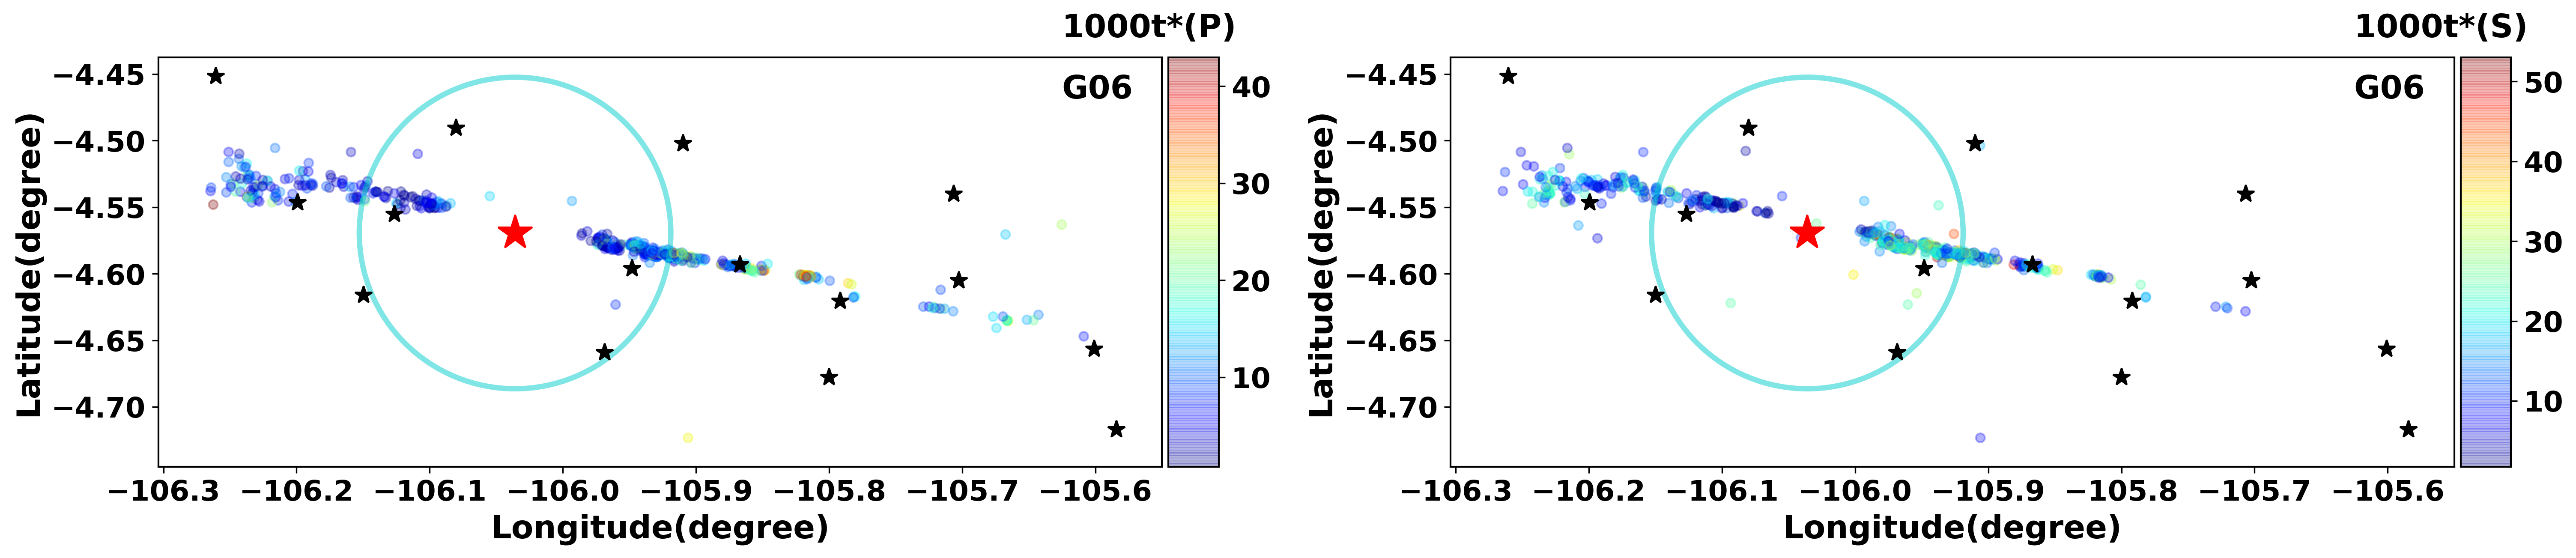

<Figure size 432x288 with 0 Axes>

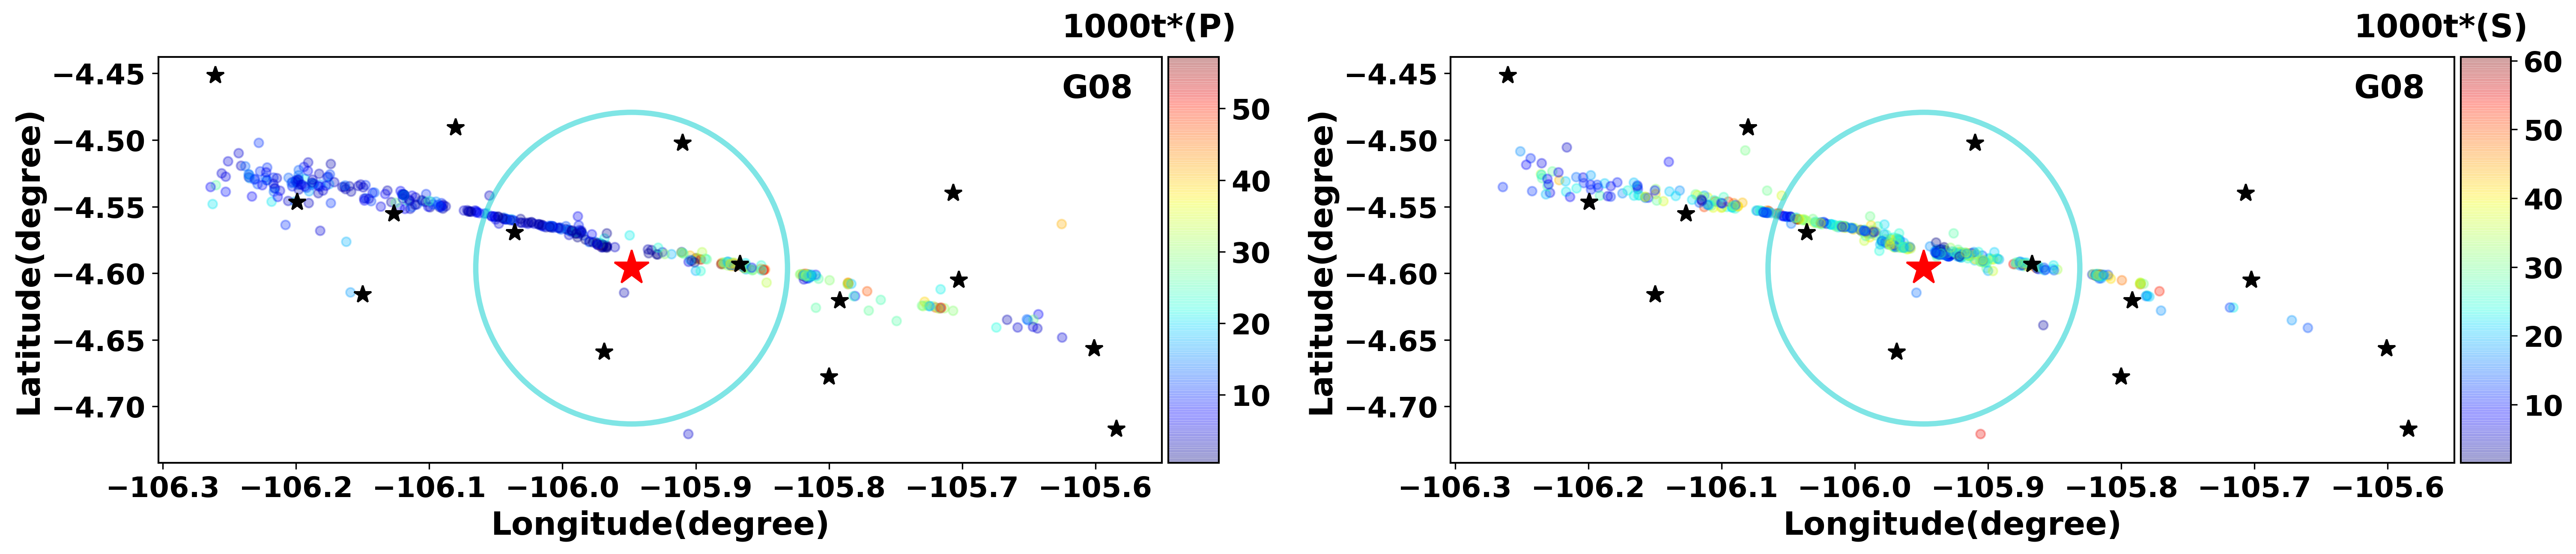

<Figure size 432x288 with 0 Axes>

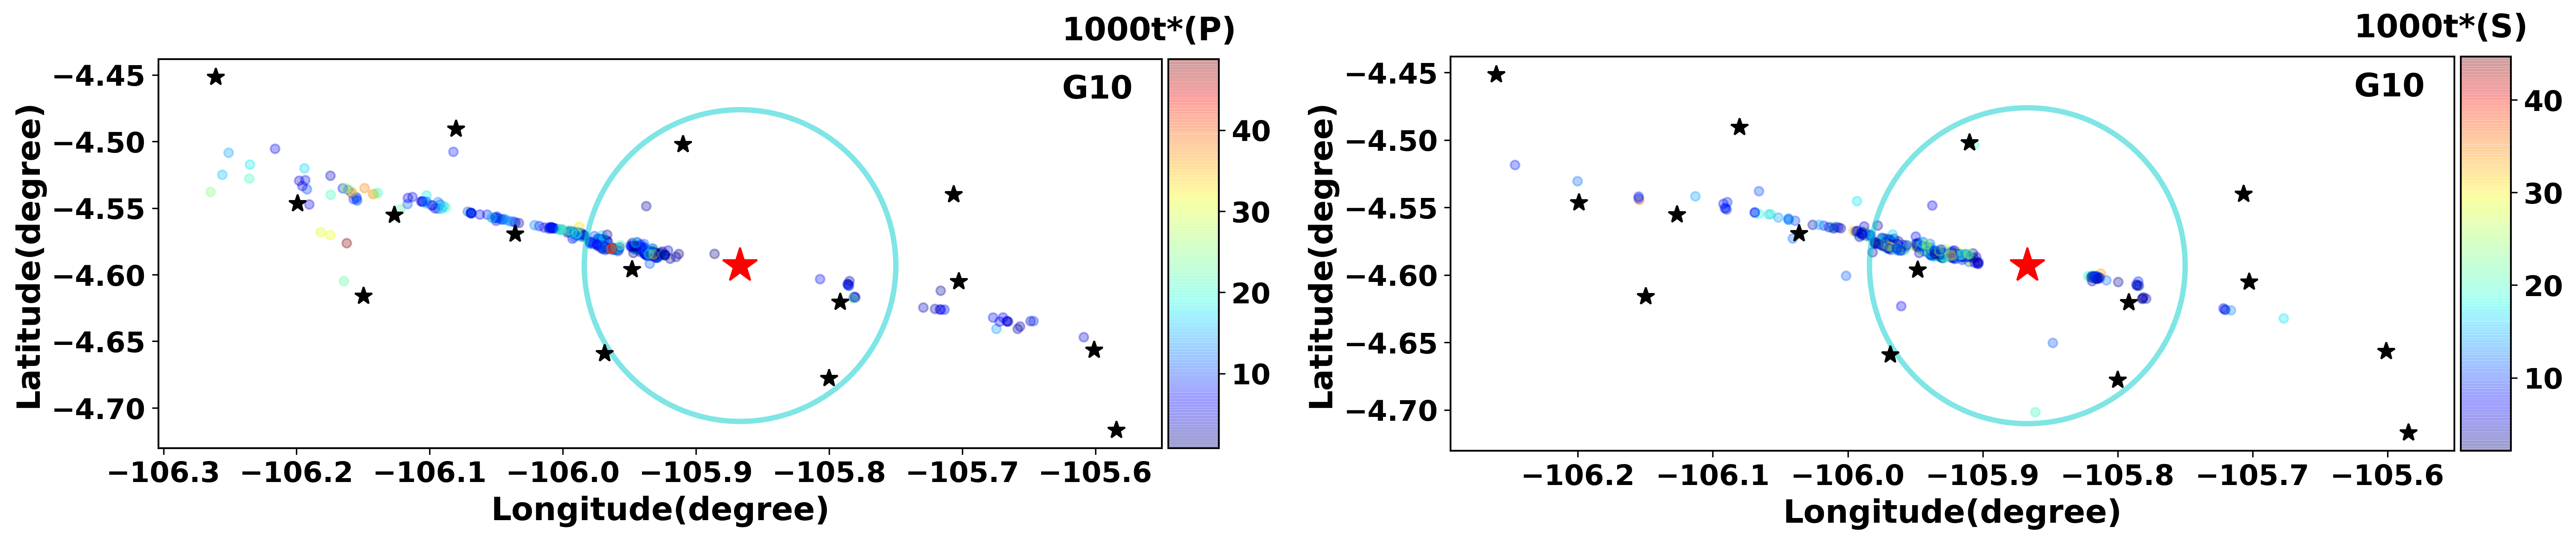

In [54]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from mpl_toolkits.axes_grid1 import make_axes_locatable
# read tstarPfile and tstarSfile
print(tstarPfile,tstarSfile)
TstarP_Dist=readTstarInformation(tstarPfile,EVE,STA)
TstarS_Dist=readTstarInformation(tstarSfile,EVE,STA)
distlimit=100;
depthlimit=25;
for sta in["G04",'G06',"G08","G10"]:
    #["G01","G02","G03","G04","G05",'G06','G07',"G08","G09","G10","G12","G13","G14","G15","G16"]:
    fig,ax=plt.subplots(1,2,figsize=(20,6))
    temp=np.array(TstarP_Dist[sta])
    index=np.nonzero(temp[:,1] <distlimit )  # ignore
    index=np.nonzero(temp[:,2] <depthlimit )
    distP=temp[index,1]
    tstarP=temp[index,0]
    evedep = temp[index,2]
    evelon = temp[index,4]
    evelat = temp[index,5]
    time   = temp[index,7]
    # tstar,dist,evedep,baz,evelon,evelat,mag,time
    
    im=ax[0].scatter(evelon,evelat,s=25,c=tstarP*1000,cmap='jet',alpha=0.3)
    circle=patches.Circle((STA[sta][0],STA[sta][1]), 0.117, facecolor='none',edgecolor=(0, 0.8, 0.8), linewidth=3, alpha=0.5)
    ax[0].add_patch(circle)
    for statemp in STA:
        ax[0].plot(STA[statemp][0],STA[statemp][1],'*k',markersize=10)
    ax[0].annotate(sta, xy=(0.9, 0.9), xycoords='axes fraction',fontsize=18)
    ax[0].plot(STA[sta][0],STA[sta][1],'r*',markersize=20)
    ax[0].set_xlabel('Longitude(degree)')
    ax[0].set_ylabel('Latitude(degree)')
    ax[0].axis('image')
#     plt.colorbar(im,ax=ax[0])
    divider = make_axes_locatable(ax[0])
    cax = divider.append_axes('right', size='5%', pad=0.05)
    cbar=plt.colorbar(im, cax=cax, orientation='vertical')
#     cbar.ax.set_ylabel('Qp')
    ax[0].annotate("1000t*(P)", xy=(0.9, 1.05), xycoords='axes fraction',fontsize=18)
    
    
    temp=np.array(TstarS_Dist[sta])

    index=np.nonzero(temp[:,1] <distlimit )
    index=np.nonzero(temp[:,2] <depthlimit )
    distS=temp[index,1]
    tstarS=temp[index,0]
    evedep = temp[index,2]
    evelon = temp[index,4]
    evelat = temp[index,5]
    time   = temp[index,7]

    # tstar,dist,evedep,baz,evelon,evelat,mag,time
    im=ax[1].scatter(evelon,evelat,s=25,c=tstarS*1000,cmap='jet',alpha=0.3)
    circle=patches.Circle((STA[sta][0],STA[sta][1]), 0.117, facecolor='none',edgecolor=(0, 0.8, 0.8), linewidth=3, alpha=0.5)
    ax[1].add_patch(circle)
    for statemp in STA:
        ax[1].plot(STA[statemp][0],STA[statemp][1],'*k',markersize=10)
    ax[1].annotate(sta, xy=(0.9, 0.9), xycoords='axes fraction',fontsize=18)
    ax[1].plot(STA[sta][0],STA[sta][1],'r*',markersize=20)
    ax[1].set_xlabel('Longitude(degree)')
    ax[1].set_ylabel('Latitude(degree)')
    ax[1].axis('image')
    divider = make_axes_locatable(ax[1])
    cax = divider.append_axes('right', size='5%', pad=0.05)
    cbar=plt.colorbar(im, cax=cax, orientation='vertical')
#     cbar = fig.colorbar(cax, ticks=[-1, 0, 1])
#     cbar.ax.set_xlabel('Qs')
    ax[1].annotate("1000t*(S)", xy=(0.9, 1.05), xycoords='axes fraction',fontsize=18)
    plt.tight_layout(w_pad=3)
    plt.savefig("./Figure/tstarXYdistribution_{}.jpg".format(sta))
    plt.pause(0.1)
    plt.clf()
    


In [ ]:
####backup the cell above 
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from mpl_toolkits.axes_grid1 import make_axes_locatable
# read tstarPfile and tstarSfile
print(tstarPfile,tstarSfile)
TstarP_Dist=readTstarInformation(tstarPfile,EVE,STA)
TstarS_Dist=readTstarInformation(tstarSfile,EVE,STA)
distlimit=100;
depthlimit=25;
for sta in["G04",'G06',"G08","G10"]:
    #["G01","G02","G03","G04","G05",'G06','G07',"G08","G09","G10","G12","G13","G14","G15","G16"]:
    fig,ax=plt.subplots(1,2,figsize=(20,6))
    temp=np.array(TstarP_Dist[sta])
    index=np.nonzero(temp[:,1] <distlimit )
    index=np.nonzero(temp[:,2] <depthlimit )
    distP=temp[index,1]
    tstarP=temp[index,0]
    evedep = temp[index,2]
    evelon = temp[index,4]
    evelat = temp[index,5]
    time   = temp[index,7]
    # tstar,dist,evedep,baz,evelon,evelat,mag,time
    
    im=ax[0].scatter(evelon,evelat,s=25,c=tstarP,cmap='jet',alpha=0.3)
    circle=patches.Circle((STA[sta][0],STA[sta][1]), 0.117, facecolor='none',edgecolor=(0, 0.8, 0.8), linewidth=3, alpha=0.5)
    ax[0].add_patch(circle)
    for statemp in STA:
        ax[0].plot(STA[statemp][0],STA[statemp][1],'*k',markersize=10)
    ax[0].annotate(sta, xy=(0.9, 0.9), xycoords='axes fraction',fontsize=18)
    ax[0].plot(STA[sta][0],STA[sta][1],'r*',markersize=20)
    ax[0].set_xlabel('Longitude(degree)')
    ax[0].set_ylabel('Latitude(degree)')
    ax[0].axis('image')
#     plt.colorbar(im,ax=ax[0])
    divider = make_axes_locatable(ax[0])
    cax = divider.append_axes('right', size='5%', pad=0.05)
    cbar=plt.colorbar(im, cax=cax, orientation='vertical')
#     cbar.ax.set_ylabel('Qp')
    ax[0].annotate("t*(P)", xy=(1., 1.05), xycoords='axes fraction',fontsize=18)
    
    
    temp=np.array(TstarS_Dist[sta])

    index=np.nonzero(temp[:,1] <distlimit )
    index=np.nonzero(temp[:,2] <depthlimit )
    distS=temp[index,1]
    tstarS=temp[index,0]
    evedep = temp[index,2]
    evelon = temp[index,4]
    evelat = temp[index,5]
    time   = temp[index,7]

    # tstar,dist,evedep,baz,evelon,evelat,mag,time
    im=ax[1].scatter(evelon,evelat,s=25,c=tstarS,cmap='jet',alpha=0.3)
    circle=patches.Circle((STA[sta][0],STA[sta][1]), 0.117, facecolor='none',edgecolor=(0, 0.8, 0.8), linewidth=3, alpha=0.5)
    ax[1].add_patch(circle)
    for statemp in STA:
        ax[1].plot(STA[statemp][0],STA[statemp][1],'*k',markersize=10)
    ax[1].annotate(sta, xy=(0.9, 0.9), xycoords='axes fraction',fontsize=18)
    ax[1].plot(STA[sta][0],STA[sta][1],'r*',markersize=20)
    ax[1].set_xlabel('Longitude(degree)')
    ax[1].set_ylabel('Latitude(degree)')
    ax[1].axis('image')
    divider = make_axes_locatable(ax[1])
    cax = divider.append_axes('right', size='5%', pad=0.05)
    cbar=plt.colorbar(im, cax=cax, orientation='vertical')
#     cbar = fig.colorbar(cax, ticks=[-1, 0, 1])
#     cbar.ax.set_xlabel('Qs')
    ax[1].annotate("t*(S)", xy=(1., 1.05), xycoords='axes fraction',fontsize=18)
    plt.tight_layout(w_pad=3)
    plt.savefig("./Figure/{}tstardist.png".format(sta))
    plt.pause(0.1)
    plt.clf()
    


./Input/tstar_P_1.28sSNR3.dat ./Input/tstar_S_1.28sSNR3.dat


<Figure size 432x288 with 0 Axes>

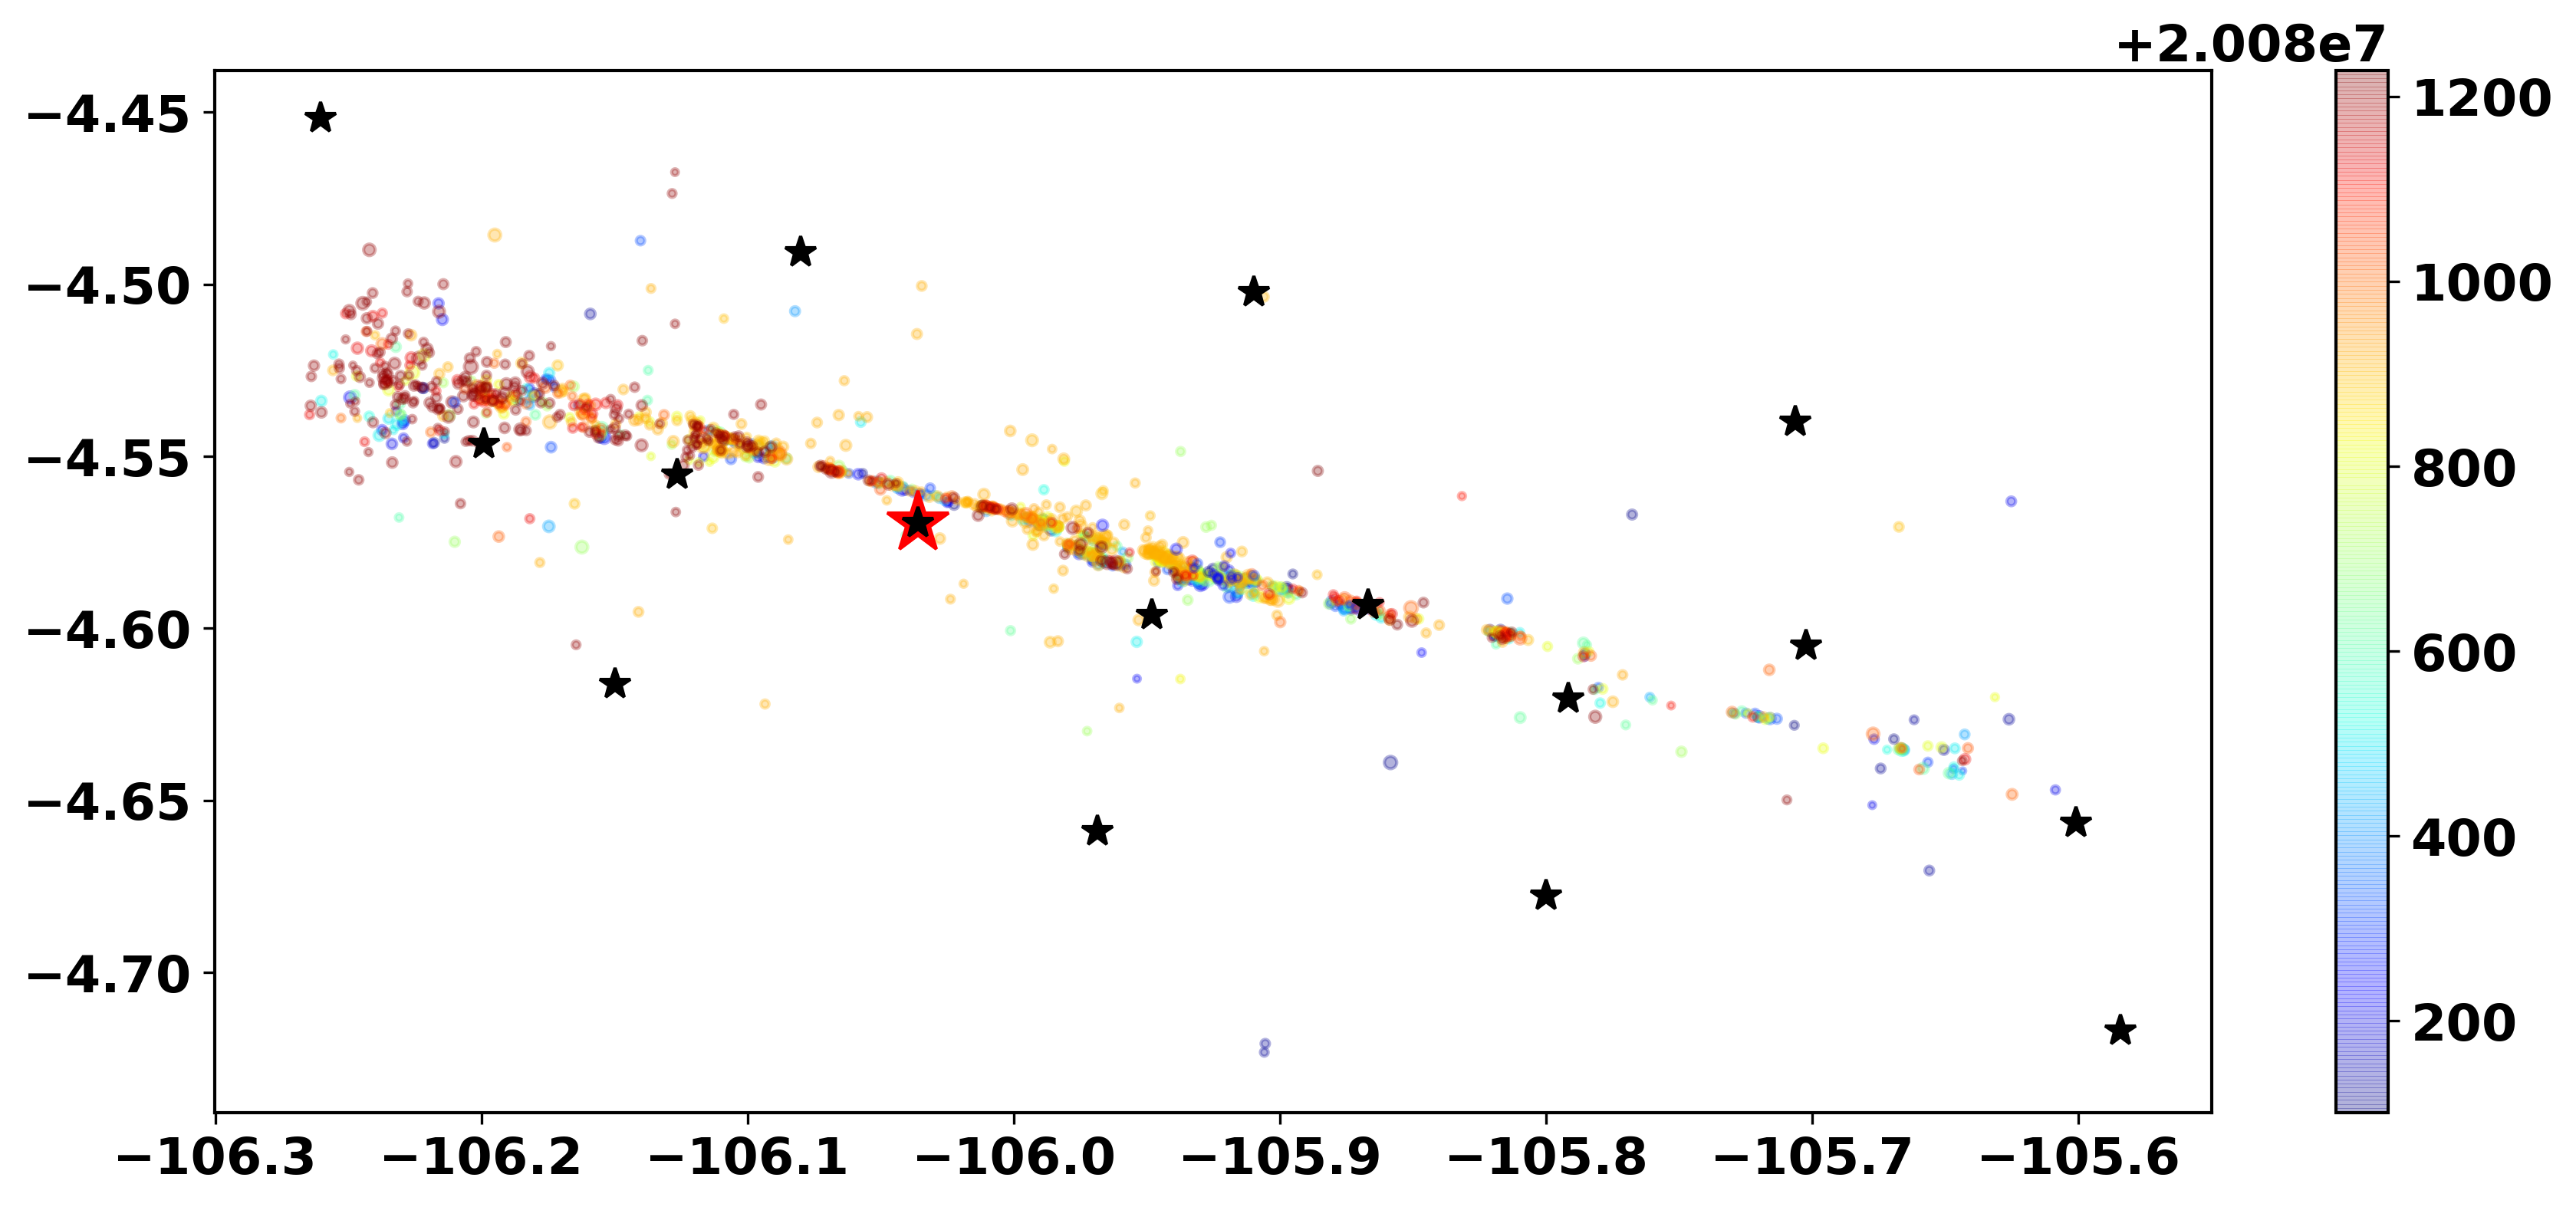

In [106]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
# read tstarPfile and tstarSfile
print(tstarPfile,tstarSfile)
event=np.loadtxt("./Input/EventCatlog")
time =event[:,0]
evelon=event[:,3]
evelat=event[:,2]
evedep=event[:,4]
evemag=event[:,5]
maglimit=2;
sta="G06"
fig,ax=plt.subplots(1,1,figsize=(14,6))
 
index=np.nonzero(evemag[:]>maglimit )
 
evedep = evedep[index]
evelon = evelon[index]
evelat = evelat[index]
time   = time[index]
im=ax.scatter(evelon,evelat,s=evemag*5,c=time,cmap='jet',alpha=0.3)
ax.plot(STA[sta][0],STA[sta][1],'r*',markersize=20)
for statemp in STA:
    ax.plot(STA[statemp][0],STA[statemp][1],'*k',markersize=10)
# ax.annotate(sta, xy=(0.05, 0.9), xycoords='axes fraction',fontsize=18)
#     print(STA['G07'][0],STA['G07'][1],'r*')
plt.colorbar(im)
 
 
plt.pause(0.1)
plt.clf()
    
